# GeoPandas

In [ ]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read and Process GeoJSON Data
# If you are familiar with Pandas, the transitioin will be easy

gdf = gpd.read_file('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/GeoData/gadm41_PHL_2.json')
gdf.head(3)

# head, tail, columns, crs, geometry

GID_2 GID_0      COUNTRY    GID_1 NAME_1 NL_NAME_1   NAME_2 VARNAME_2  \
0  PHL.1.1_1   PHL  Philippines  PHL.1_1   Abra        NA  Bangued        NA   
1  PHL.1.2_1   PHL  Philippines  PHL.1_1   Abra        NA  Boliney        NA   
2  PHL.1.3_1   PHL  Philippines  PHL.1_1   Abra        NA    Bucay        NA   

  NL_NAME_2           TYPE_2     ENGTYPE_2    CC_2    HASC_2  \
0        NA  Bayan|Munisipyo  Municipality  140101  PH.AB.BN   
1        NA  Bayan|Munisipyo  Municipality  140102  PH.AB.BL   
2        NA  Bayan|Munisipyo  Municipality  140103  PH.AB.BU   

                                            geometry  
0  MULTIPOLYGON (((120.6113 17.4956, 120.6055 17....  
1  MULTIPOLYGON (((120.814 17.3421, 120.7686 17.3...  
2  MULTIPOLYGON (((120.6777 17.4574, 120.6732 17....

In [ ]:
# Calculate centroids

# Centroid means gitna
gdf['centroid_x'] = gdf['geometry'].centroid.x
gdf['centroid_y'] = gdf['geometry'].centroid.y

gdf.head(3)

GID_2 GID_0      COUNTRY    GID_1 NAME_1 NL_NAME_1   NAME_2 VARNAME_2  \
0  PHL.1.1_1   PHL  Philippines  PHL.1_1   Abra        NA  Bangued        NA   
1  PHL.1.2_1   PHL  Philippines  PHL.1_1   Abra        NA  Boliney        NA   
2  PHL.1.3_1   PHL  Philippines  PHL.1_1   Abra        NA    Bucay        NA   

  NL_NAME_2           TYPE_2     ENGTYPE_2    CC_2    HASC_2  \
0        NA  Bayan|Munisipyo  Municipality  140101  PH.AB.BN   
1        NA  Bayan|Munisipyo  Municipality  140102  PH.AB.BL   
2        NA  Bayan|Munisipyo  Municipality  140103  PH.AB.BU   

                                            geometry  centroid_x  centroid_y  
0  MULTIPOLYGON (((120.6113 17.4956, 120.6055 17....  120.607094   17.600613  
1  MULTIPOLYGON (((120.814 17.3421, 120.7686 17.3...  120.868131   17.379642  
2  MULTIPOLYGON (((120.6777 17.4574, 120.6732 17....  120.722587   17.522872

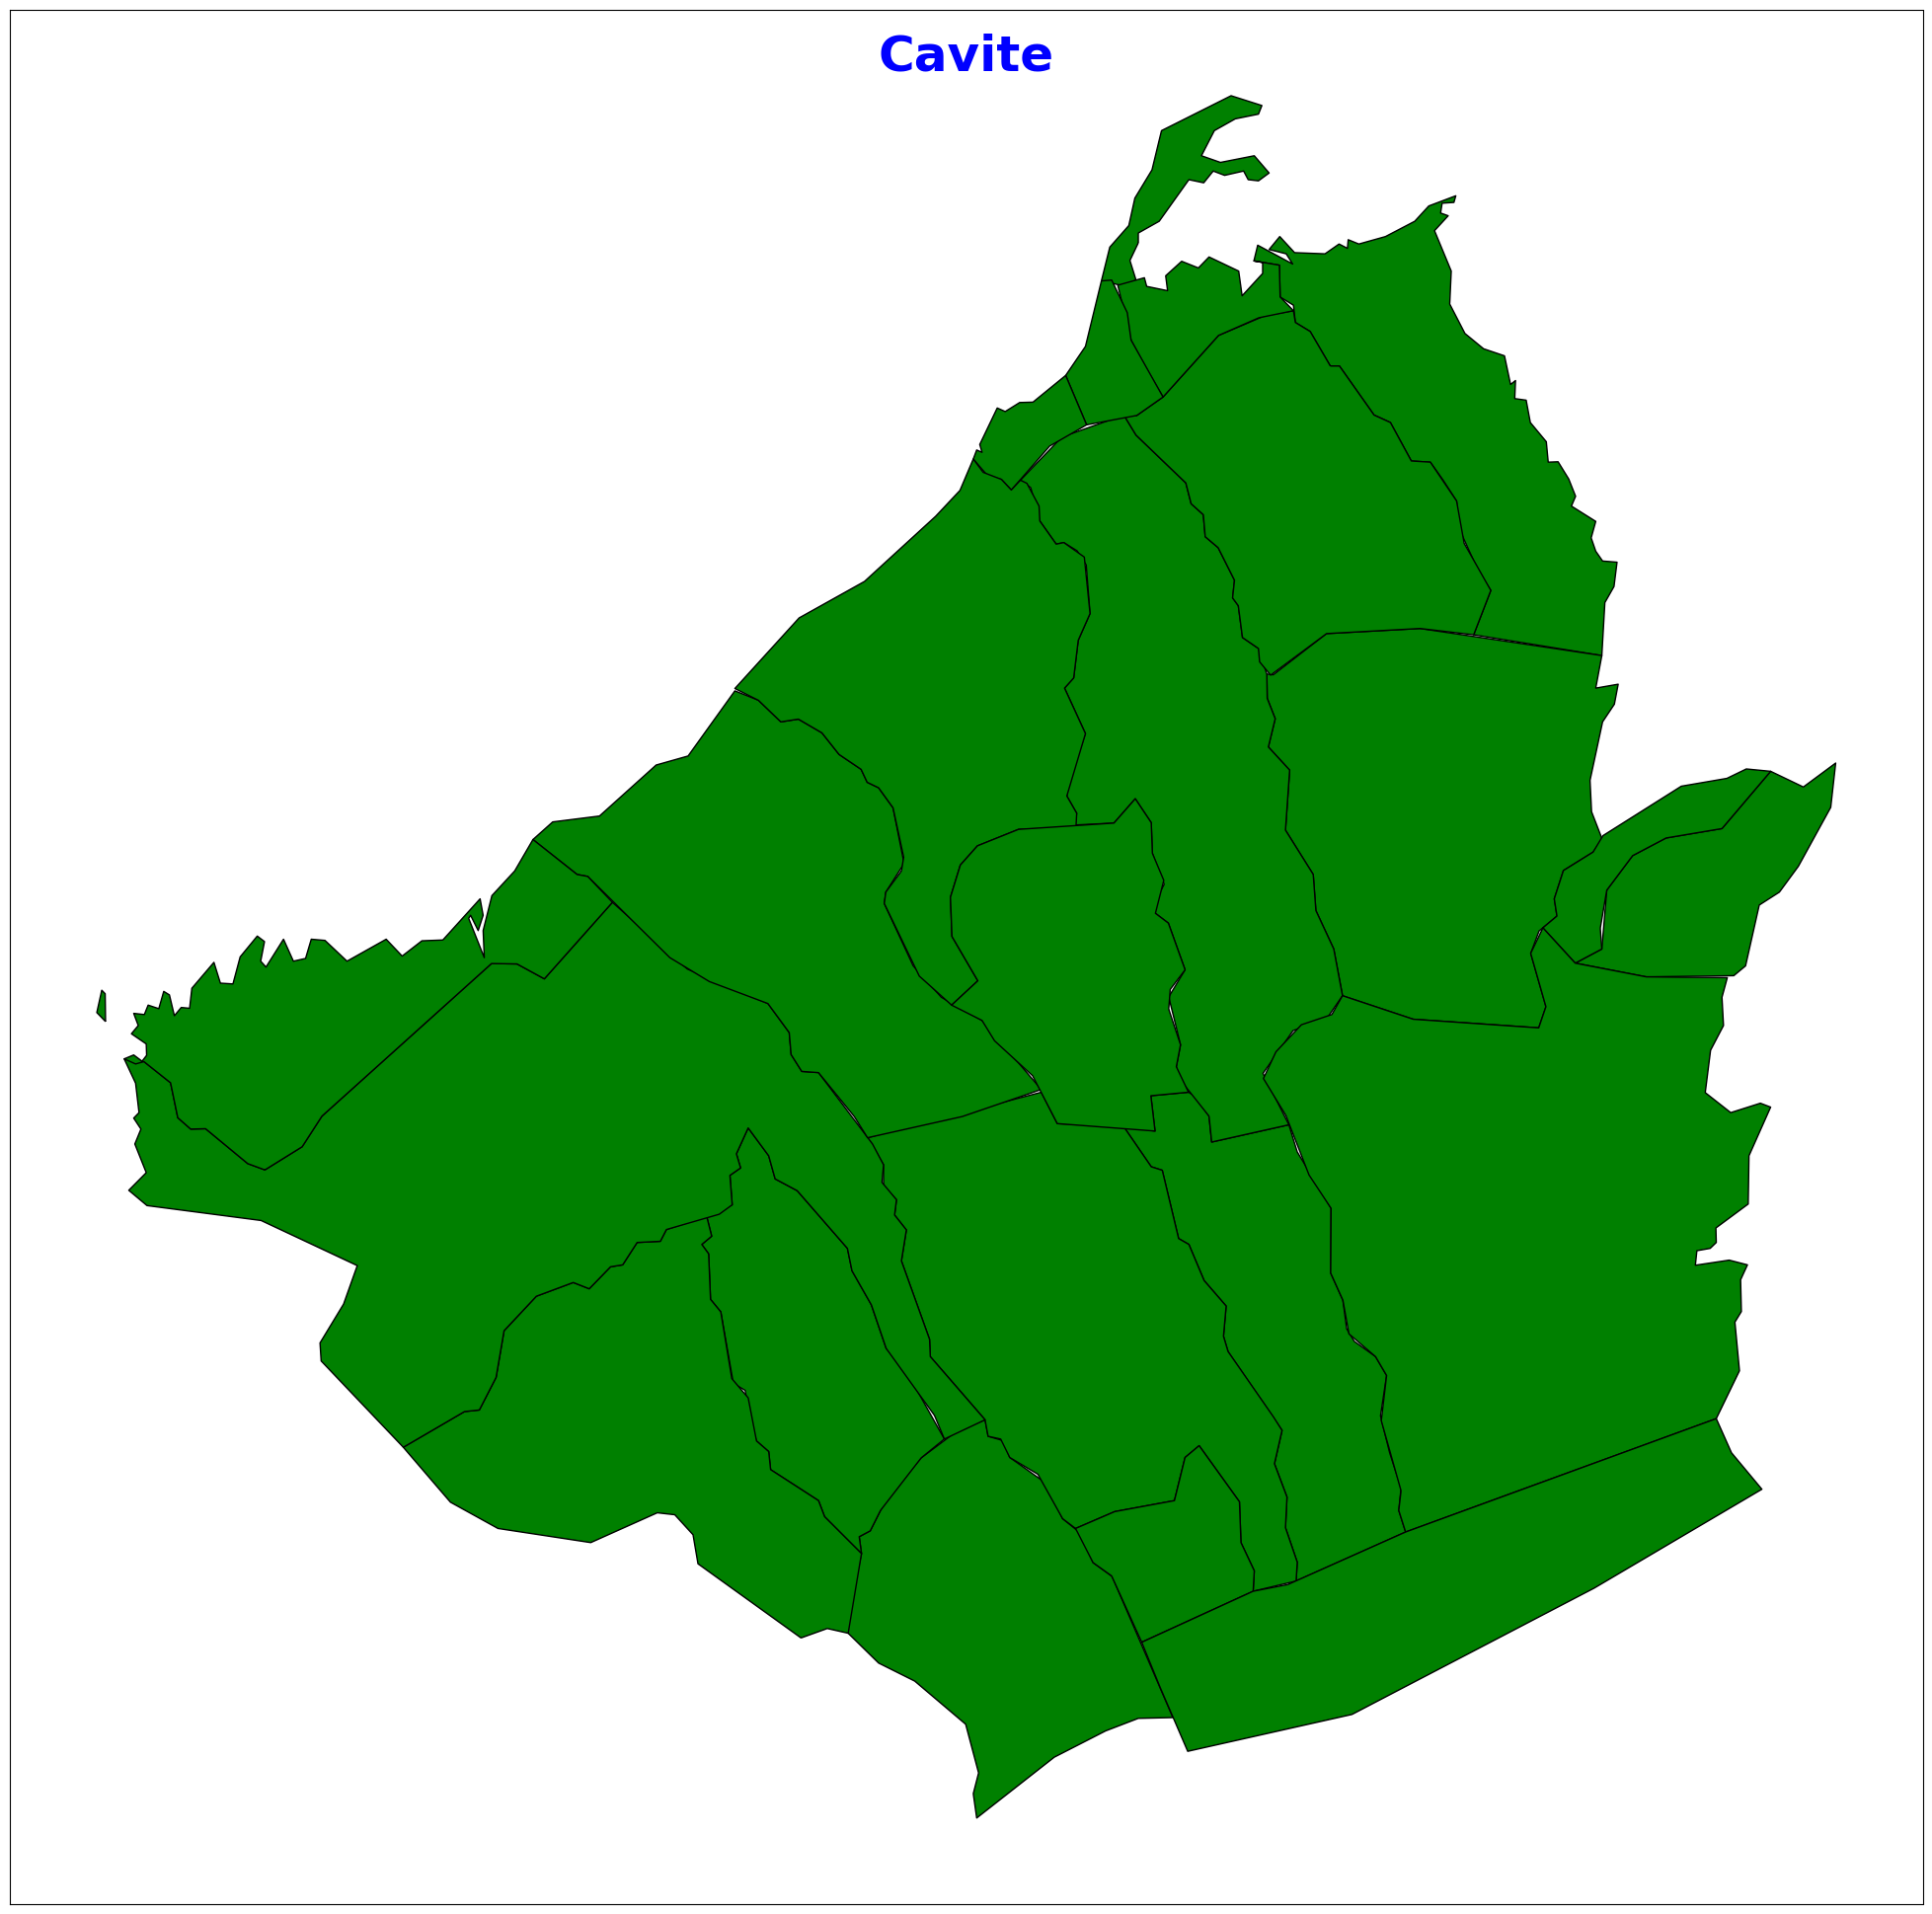

In [ ]:
# Basic Plotting

# Create a plot with a custom figure size of 10 inches wide by 8 inches tall
fig, ax = plt.subplots(figsize=(25, 25))

x = gdf.query("NAME_1 == 'Cavite'")
# x = x.drop(index = [1309])

x.plot(ax = ax, color = 'green', edgecolor = 'black')

# Add a title
ax.set_title("", pad = 40, fontweight = 'bold', fontsize = 15)

# Add grid
# ax.grid(alpha = 0.5)

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Here is a simple approach to add text (x, y, 'text')
ax.text(0.50, 0.975, 'Cavite', transform = ax.transAxes, fontsize=36, fontweight='bold',
        ha='center', va='center', color='blue')


plt.show()

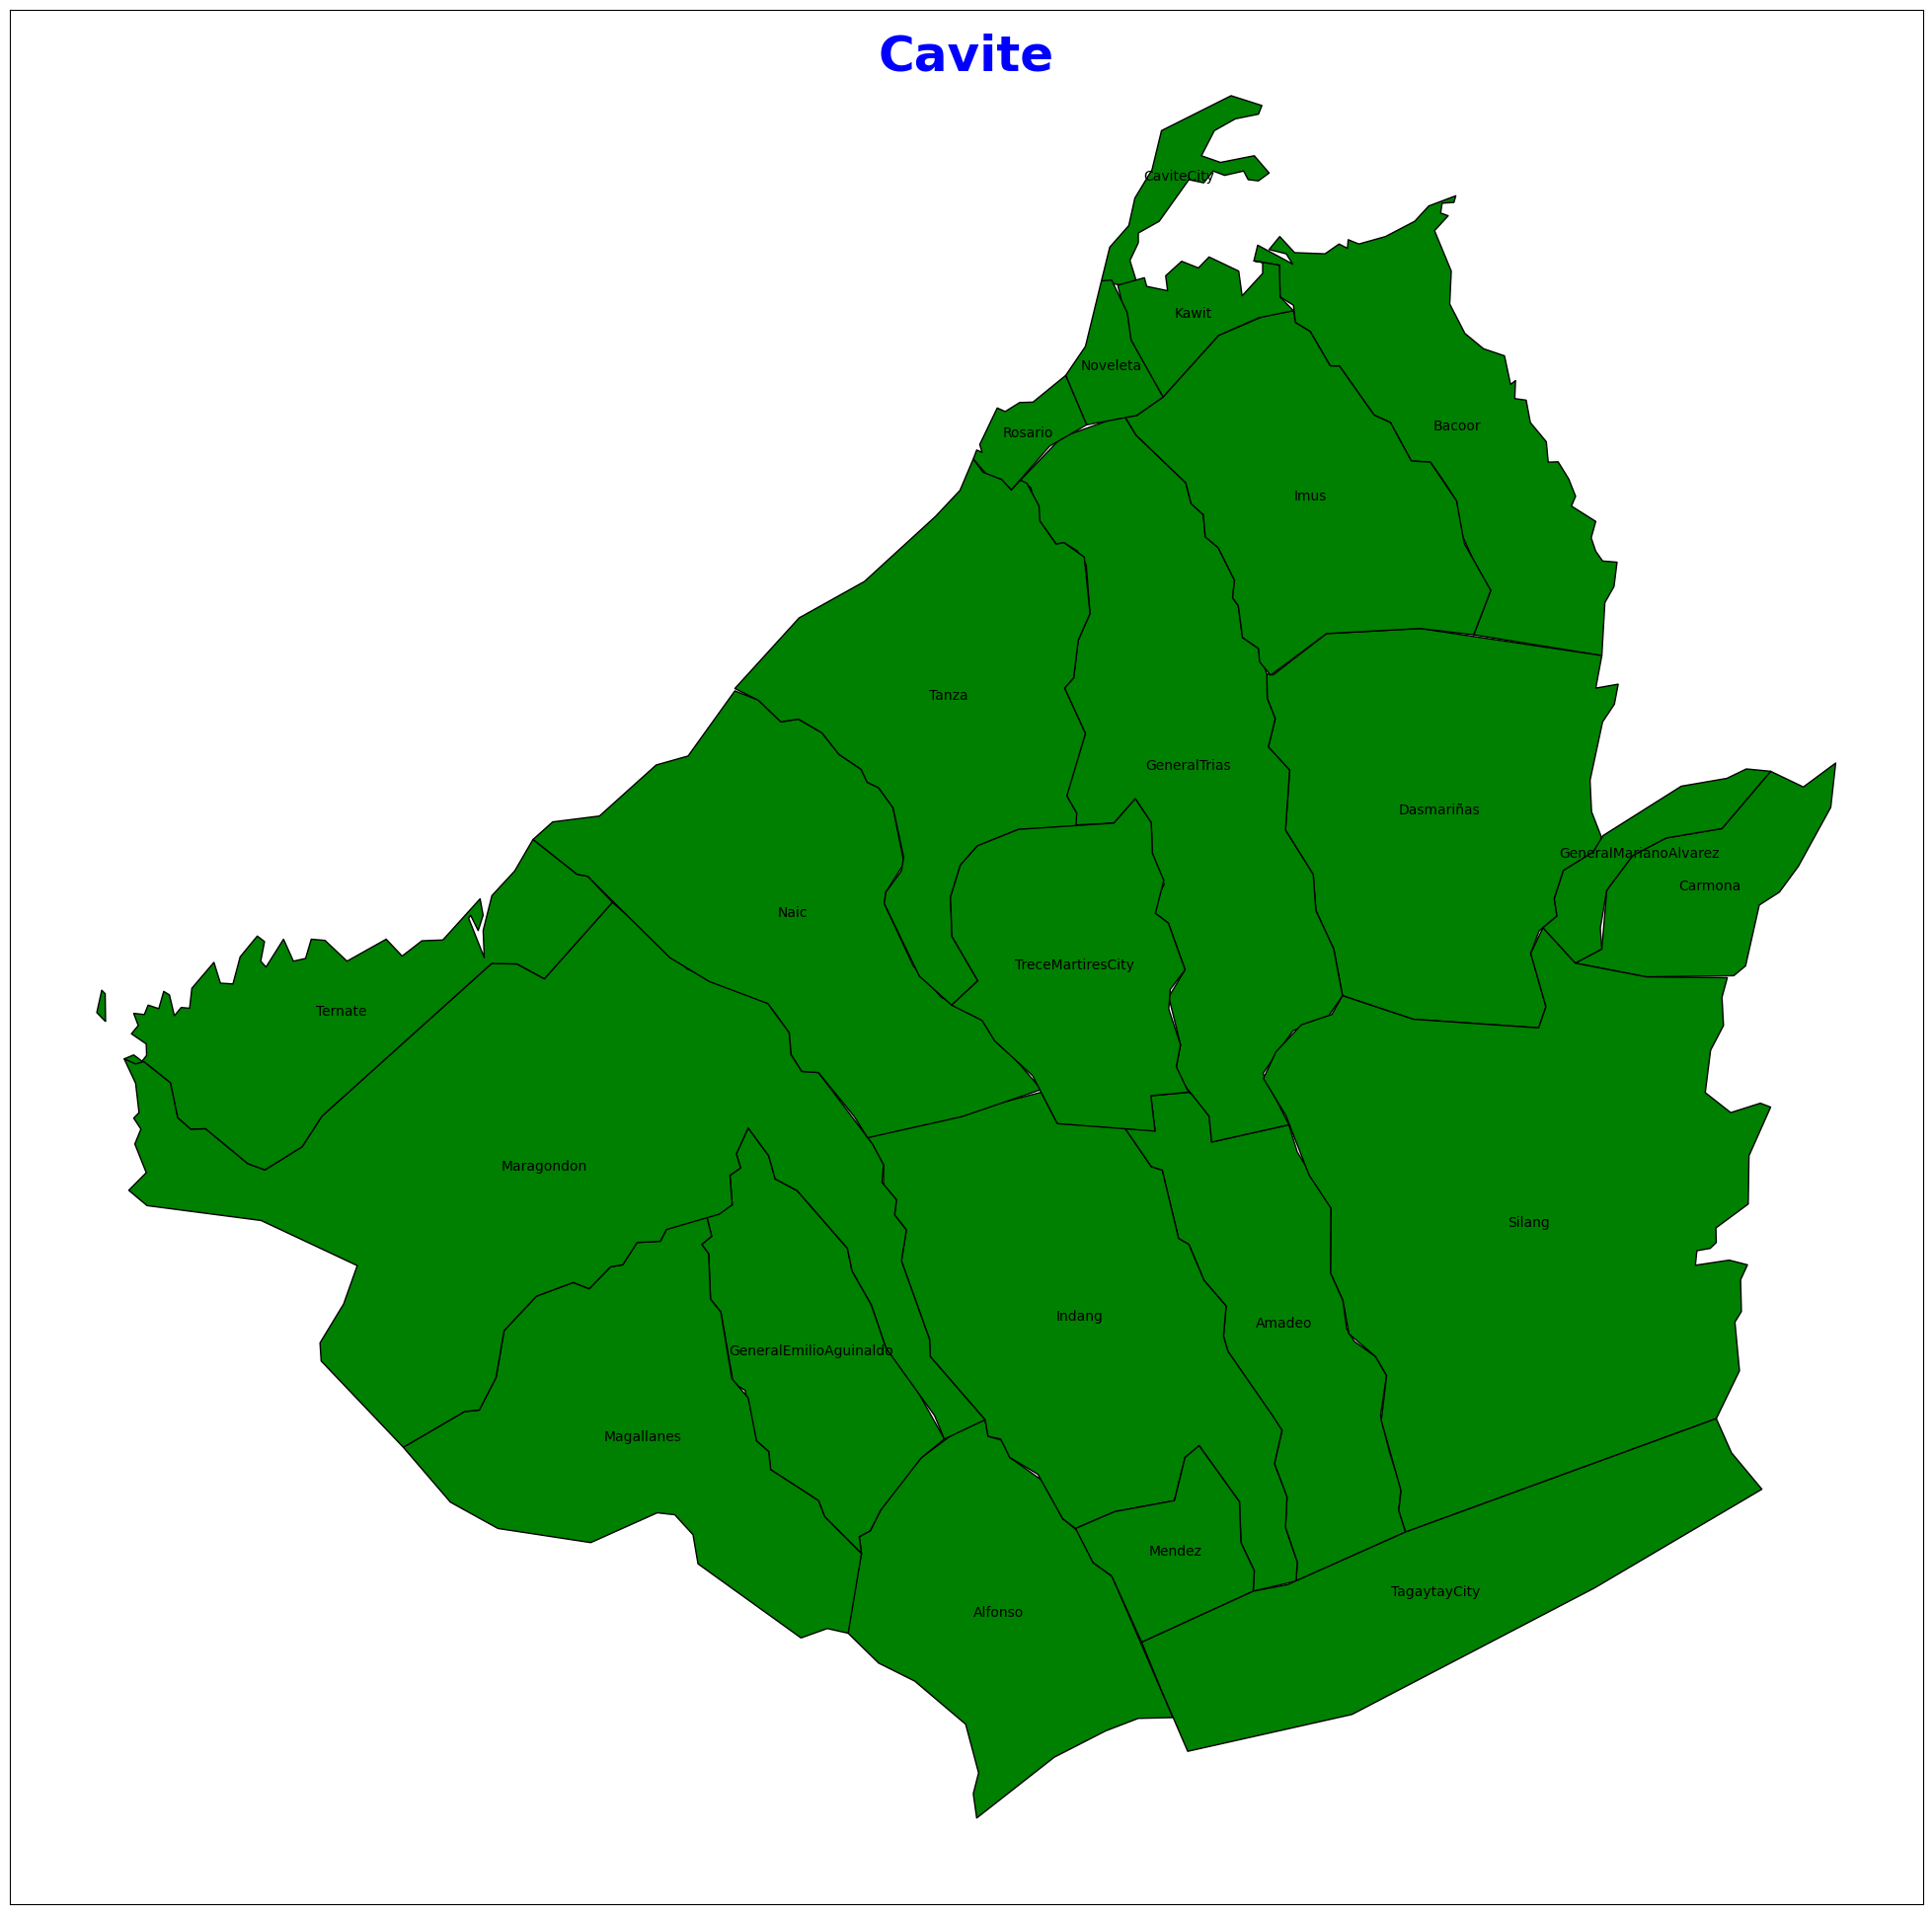

In [ ]:
# Basic Plotting (Annotated)

# Create a plot with a custom figure size of 10 inches wide by 8 inches tall
fig, ax = plt.subplots(figsize=(25, 25))

x = gdf.query("NAME_1 == 'Cavite'")

x.plot(ax = ax, color = 'green', edgecolor = 'black')

# Add a title
ax.set_title("", pad = 40, fontweight = 'bold', fontsize = 18)

# Add grid
# ax.grid(alpha = 0.5)

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Here is a simple approach to add text (x, y, 'text')
ax.text(0.50, 0.975, 'Cavite', transform = ax.transAxes, fontsize=36, fontweight='bold',
        ha='center', va='center', color='blue')

# Annotation with name of Municipalities
for idx, row in x.iterrows():

  ax.annotate(row['NAME_2'], xy = row['geometry'].centroid.coords[0], ha = 'center', va = 'center', fontsize = 10, color = 'black')

plt.show()

# GeoPandas Part 2

In [ ]:
# Isolate Cavite
gdf_cavite = gdf.query("NAME_1 == 'Cavite'")

gdf_cavite.head(3)

GID_2 GID_0      COUNTRY     GID_1  NAME_1 NL_NAME_1   NAME_2  \
416  PHL.24.1_1   PHL  Philippines  PHL.24_1  Cavite        NA  Alfonso   
417  PHL.24.2_1   PHL  Philippines  PHL.24_1  Cavite        NA   Amadeo   
418  PHL.24.3_1   PHL  Philippines  PHL.24_1  Cavite        NA   Bacoor   

    VARNAME_2 NL_NAME_2           TYPE_2     ENGTYPE_2   CC_2    HASC_2  \
416        NA        NA  Bayan|Munisipyo  Municipality  42101  PH.CV.AF   
417        NA        NA  Bayan|Munisipyo  Municipality  42102  PH.CV.AA   
418        NA        NA  Bayan|Munisipyo  Municipality  42103  PH.CV.BC   

                                              geometry  centroid_x  centroid_y  
416  MULTIPOLYGON (((120.8433 14.0675, 120.8447 14....  120.849967   14.113728  
417  MULTIPOLYGON (((120.9528 14.1544, 120.9558 14....  120.925039   14.187446  
418  MULTIPOLYGON (((120.9761 14.3792, 120.9711 14....  120.970535   14.415948

In [ ]:
# Add Information from External Data Source

data = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/GeoData/cavite_province.csv')
data.head(5)

NAME_1      NAME_2      LGU    District                   Category  \
0  Cavite     Alfonso  Alfonso  District 8   First Class Municipality   
1  Cavite      Amadeo   Amadeo  District 7  Fourth Class Municipality   
2  Cavite      Bacoor   Bacoor  District 2             Component City   
3  Cavite     Carmona  Carmona  District 5   First Class Municipality   
4  Cavite  CaviteCity   Cavite  District 1             Component City   

     Score  Population  Population Weight (50%)       Revenue  \
0  37.8224       51839                    0.006  3.394948e+08   
1  32.9745       41901                    0.005  2.170650e+07   
2  42.4248      664625                    0.079  3.036774e+09   
3  43.8327      106256                    0.013  1.133964e+09   
4  33.0578      100674                    0.012  1.643066e+08   

   Revenue Weight (50%)  Total Percentage  Provincial Score  \
0                 0.008             0.014            0.5484   
1                 0.001             0.006            0.1814   
2                 0.074             0.153            6.4868   
3                 0.028             0.040            1.7621   
4                 0.004             0.016            0.5289   

   Population_Growth  Economic Dynamism  Government Efficiency  \
0               2.87             4.0050                 9.8682   
1               2.28             6.2073                 8.2824   
2               2.16             6.0954                 9.9001   
3               1.81             7.6384                11.2303   
4              -0.44             3.2379                 8.8422   

   Infrastructure  Resiliency  Innovation  
0          3.0799     11.5771      9.2823  
1          3.8485     11.2599      3.3764  
2          5.7636     11.4248      9.2409  
3          3.7397     11.6230      9.5340  
4          3.6751     11.2792      6.0234

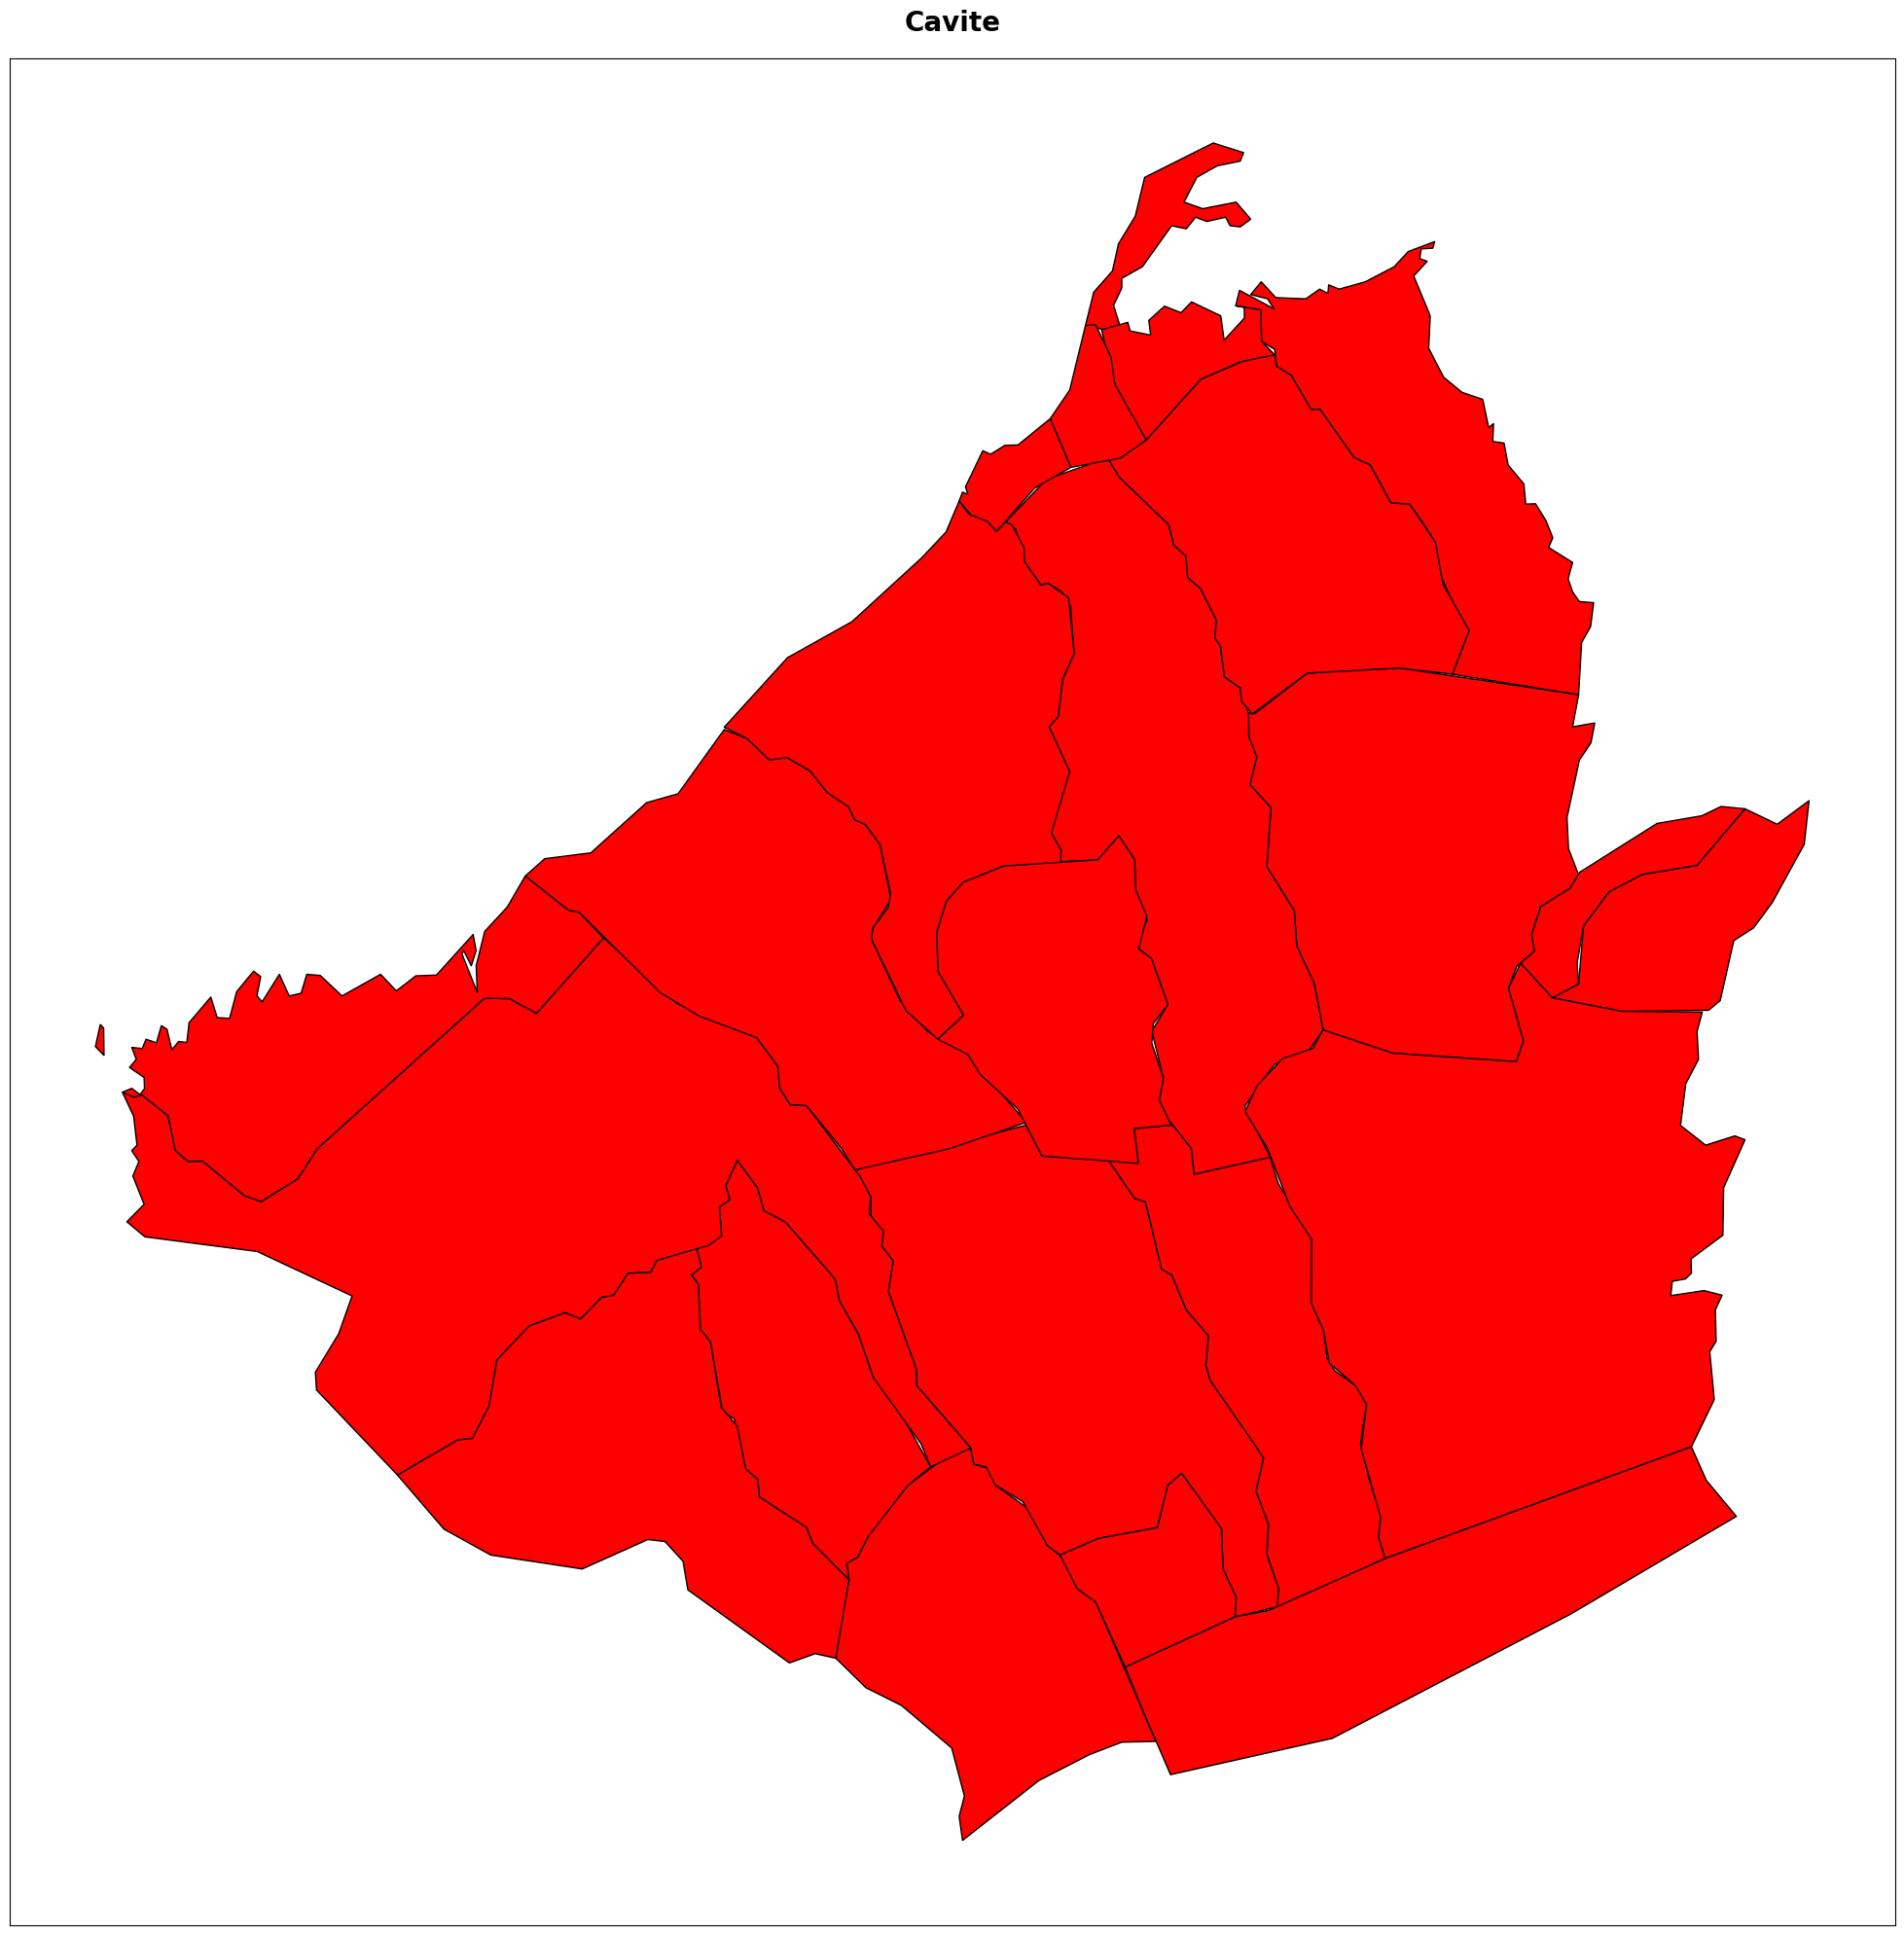

In [ ]:
# Basic Plotting

# Create a plot with a custom figure size of 10 inches wide by 8 inches tall
fig, ax = plt.subplots(figsize=(25, 25))

gdf_cavite.plot(ax = ax, color = 'red', edgecolor = 'black')

# Add a title
ax.set_title("Cavite", pad = 20, fontweight = 'bold', fontsize = 20)

# Remove Ticks
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [ ]:
# Merge 'data' to 'gdf'  via NAME_2, Rember merge in Pandas?

final_data = pd.merge(gdf_cavite, data, on = 'NAME_2', how = 'inner')
final_data = final_data.drop(['GID_2', 'GID_0',
                              'COUNTRY', 'GID_1',
                              'NAME_1_x', 'NL_NAME_1',
                              'VARNAME_2', 'NL_NAME_2',
                              'TYPE_2', 'ENGTYPE_2', 'CC_2',
                              'HASC_2', 'NAME_1_y'], axis = 1)

final_data.head(5)

NAME_2                                           geometry  centroid_x  \
0     Alfonso  MULTIPOLYGON (((120.8433 14.0675, 120.8447 14....  120.849967   
1      Amadeo  MULTIPOLYGON (((120.9528 14.1544, 120.9558 14....  120.925039   
2      Bacoor  MULTIPOLYGON (((120.9761 14.3792, 120.9711 14....  120.970535   
3     Carmona  MULTIPOLYGON (((121.0603 14.3039, 121.0553 14....  121.037075   
4  CaviteCity  MULTIPOLYGON (((120.8867 14.4628, 120.8845 14....  120.897392   

   centroid_y      LGU    District                   Category    Score  \
0   14.113728  Alfonso  District 8   First Class Municipality  37.8224   
1   14.187446   Amadeo  District 7  Fourth Class Municipality  32.9745   
2   14.415948   Bacoor  District 2             Component City  42.4248   
3   14.298948  Carmona  District 5   First Class Municipality  43.8327   
4   14.479722   Cavite  District 1             Component City  33.0578   

   Population  Population Weight (50%)       Revenue  Revenue Weight (50%)  \
0       51839                    0.006  3.394948e+08                 0.008   
1       41901                    0.005  2.170650e+07                 0.001   
2      664625                    0.079  3.036774e+09                 0.074   
3      106256                    0.013  1.133964e+09                 0.028   
4      100674                    0.012  1.643066e+08                 0.004   

   Total Percentage  Provincial Score  Population_Growth  Economic Dynamism  \
0             0.014            0.5484               2.87             4.0050   
1             0.006            0.1814               2.28             6.2073   
2             0.153            6.4868               2.16             6.0954   
3             0.040            1.7621               1.81             7.6384   
4             0.016            0.5289              -0.44             3.2379   

   Government Efficiency  Infrastructure  Resiliency  Innovation  
0                 9.8682          3.0799     11.5771      9.2823  
1                 8.2824          3.8485     11.2599      3.3764  
2                 9.9001          5.7636     11.4248      9.2409  
3                11.2303          3.7397     11.6230      9.5340  
4                 8.8422          3.6751     11.2792      6.0234

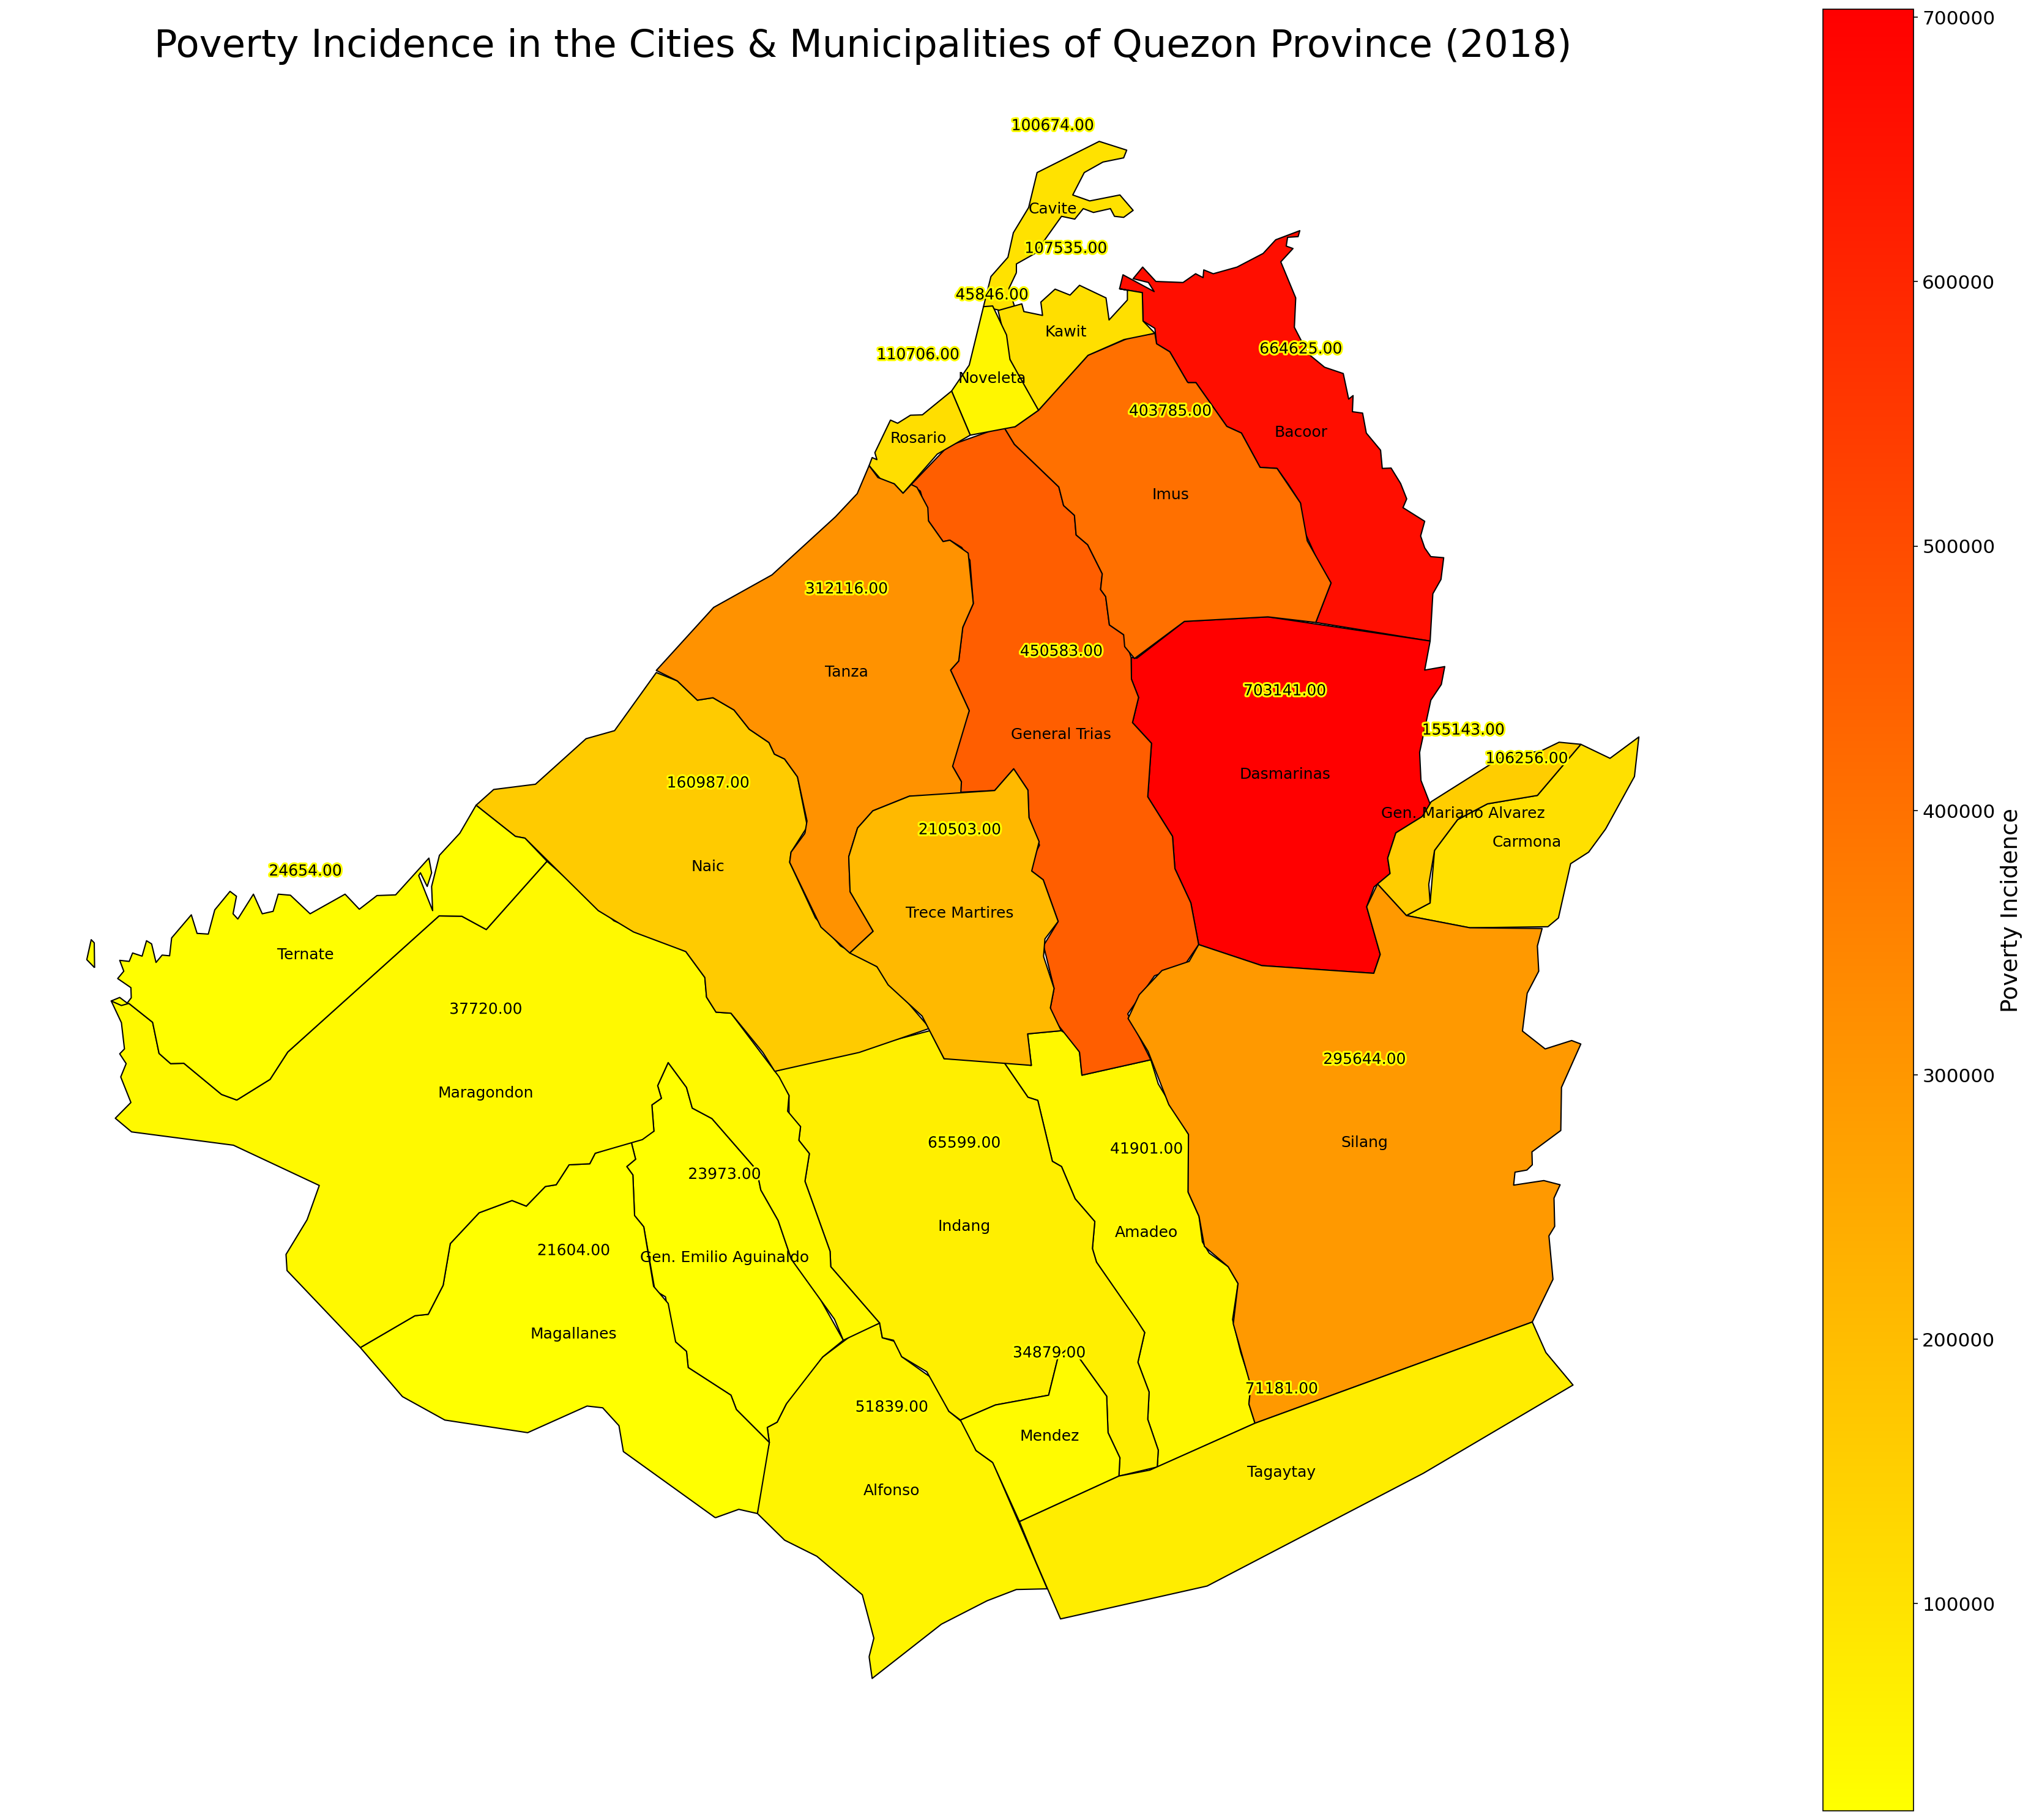

In [ ]:
# Create Maps with Data

import matplotlib.patheffects as PathEffects

# Normalize Poverty_Incidence for Color Mapping
norm = plt.Normalize(vmin = final_data['Population'].min(), vmax = final_data['Population'].max())
cmap = plt.cm.autumn_r # color maps

# Plot the map with Population heatmap
fig, ax = plt.subplots(figsize=(30, 30), dpi = 150)
final_data.plot(ax = ax, color = final_data['Population'].map(lambda x: cmap(norm(x))), edgecolor = 'black', linewidth = 1)

# Annotate the municipalities
for idx, row in final_data.iterrows():

    ax.annotate(text=row['LGU'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12, color='black')

# Add an arrow annotation for Population
for idx, row in final_data.iterrows():

    centroid = row['geometry'].centroid
    ax.annotate(f"{row['Population']:.2f}",
                xy=(centroid.x, centroid.y + 0.025), # Adjusted position
                ha = 'center', va = 'center',
                fontsize = 12, color='black', path_effects=[PathEffects.withStroke(linewidth=3, foreground='yellow')])


# Create colorbar as legend

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, aspect = 20, shrink = 0.85)
cbar.set_label('Population', fontsize = 18)
cbar.ax.tick_params(labelsize = 15)

ax.set_title('Population in the Cities & Municipalities of Quezon Province (2018)', fontsize = 30, loc = 'center')
ax.axis('off')

plt.show()

In [ ]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

In [ ]:
# Define your own color maps

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

# Define your custom colormap
colors = ['green', 'aqua', 'yellow', 'red']
custom_cmap = LinearSegmentedColormap.from_list("CustomMap", colors, N=256)

# Example usage with Normalize
norm = plt.Normalize(vmin=final_data['Population'].min(), vmax=final_data['Population'].max())

# Apply the custom colormap
fig, ax = plt.subplots(figsize=(30, 30), dpi=350)
final_data.plot(ax=ax, color=final_data['Population'].map(lambda x: custom_cmap(norm(x))), edgecolor='black', linewidth=1)

# Annotate the municipalities
for idx, row in final_data.iterrows():

    ax.annotate(text=row['LGU'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12, color='black')

# Add an arrow annotation for poverty incidence
for idx, row in final_data.iterrows():

    centroid = row['geometry'].centroid
    ax.annotate(f"{row['Population']:.2f}",
                xy=(centroid.x, centroid.y + 0.025), # Adjusted position
                ha = 'center', va = 'center',
                fontsize = 12, color='black', path_effects=[PathEffects.withStroke(linewidth=3, foreground='yellow')])

# Colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, aspect=20, shrink=0.85)
cbar.set_label('Poverty Incidence', fontsize=18)
cbar.ax.tick_params(labelsize=15)




plt.show()

# GeoPandas Part 3

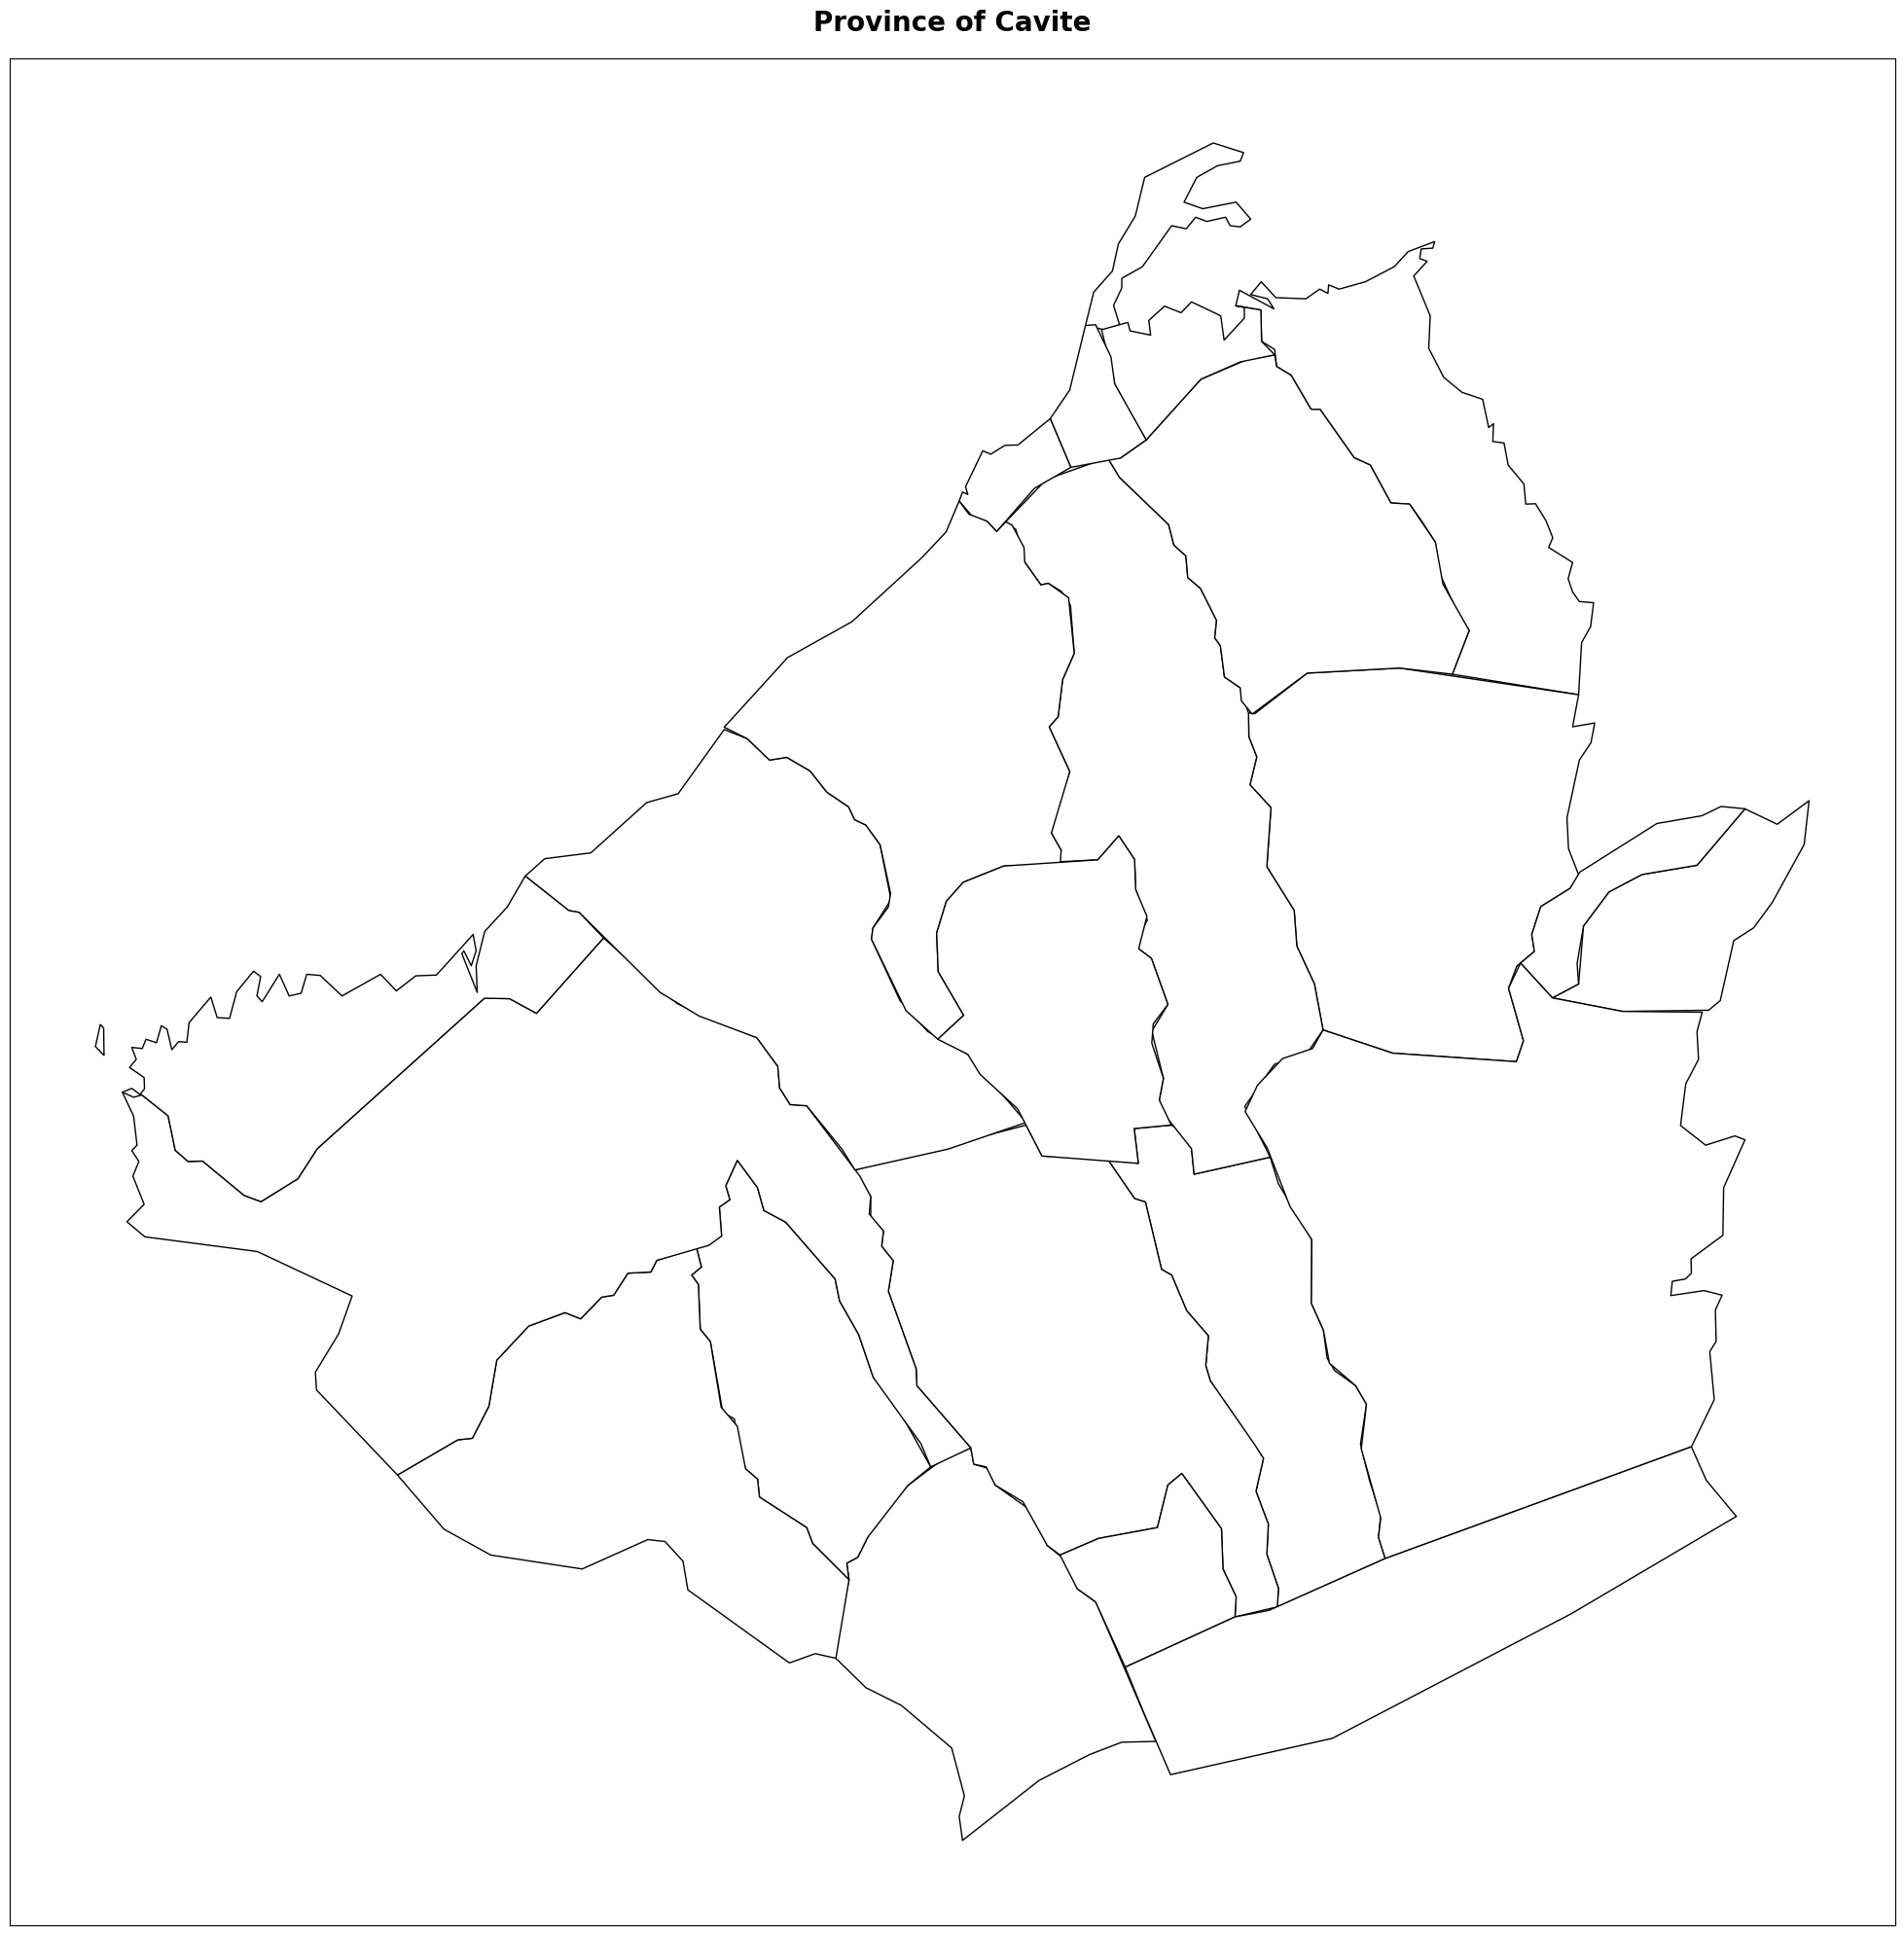

In [ ]:
# Basic Plotting

# Create a plot with a custom figure size of 10 inches wide by 8 inches tall
fig, ax = plt.subplots(figsize=(25, 25))

gdf_cavite.plot(ax = ax, color = 'white', edgecolor = 'black')

# Add a title
ax.set_title("Province of Cavite", pad = 20, fontweight = 'bold', fontsize = 20)

# Remove Ticks
ax.set_xticks([])
ax.set_yticks([])

plt.show()


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/GeoData/cavite_province.csv')
data[data['LGU'] == 'Cavite']

NAME_1      NAME_2     LGU    District        Category    Score  \
4  Cavite  CaviteCity  Cavite  District 1  Component City  33.0578   

   Population  Population Weight (50%)      Revenue  Revenue Weight (50%)  \
4      100674                    0.012  164306615.0                 0.004   

   Total Percentage  Provincial Score  Population_Growth  Economic Dynamism  \
4             0.016            0.5289              -0.44             3.2379   

   Government Efficiency  Infrastructure  Resiliency  Innovation  
4                 8.8422          3.6751     11.2792      6.0234

In [ ]:
# Merge 'data' to 'gdf'  via NAME_2, Rember merge in Pandas?

final_data = pd.merge(gdf_cavite, data, on = 'NAME_2', how = 'inner')
final_data = final_data.drop(['GID_2', 'GID_0',
                              'COUNTRY', 'GID_1',
                              'NAME_1_x', 'NL_NAME_1',
                              'VARNAME_2', 'NL_NAME_2',
                              'TYPE_2', 'ENGTYPE_2', 'CC_2',
                              'HASC_2', 'NAME_1_y'], axis = 1)

final_data.head(1)

NAME_2                                           geometry  centroid_x  \
0  Alfonso  MULTIPOLYGON (((120.8433 14.0675, 120.8447 14....  120.849967   

   centroid_y      LGU    District                  Category    Score  \
0   14.113728  Alfonso  District 8  First Class Municipality  37.8224   

   Population  Population Weight (50%)      Revenue  Revenue Weight (50%)  \
0       51839                    0.006  339494758.2                 0.008   

   Total Percentage  Provincial Score  Population_Growth  Economic Dynamism  \
0             0.014            0.5484               2.87              4.005   

   Government Efficiency  Infrastructure  Resiliency  Innovation  
0                 9.8682          3.0799     11.5771      9.2823

In [ ]:
# Load Another Data


# Read and Process GeoJSON data

gdf = gpd.read_file('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/GeoData/gadm41_PHL_2.json')

# Isolate Quezon Province Only

gdf_quezon = gdf.query("NAME_1 == 'Quezon'")


# Clean Data

gdf_quezon = gdf_quezon.drop(index = [1309])

df_points = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/GeoData/quezon_specific.csv')
df_points

NAME_1         Area   latitude   longitude
0  Quezon  Patio Rizal  14.114325  121.554904

In [ ]:

# Create geometric points

specific_points = {
    'Area': ['Kamay ni Jesus', 'Port of Real', 'Provincial Capitol', 'Cagbalete Island', 'Calilayan Island', 'Nabangka Elementary School'],
    'latitude': [14.10128, 14.670841, 13.92839, 14.28795, 13.94656, 13.83793,],
    'longitude': [121.57285, 121.613704, 121.61385, 121.83048, 121.71886, 122.47872]
}

df_points = pd.DataFrame(specific_points)
df_points = gpd.GeoDataFrame(df_points, geometry = gpd.points_from_xy(df_points['longitude'], df_points['latitude']))
df_points

Area   latitude   longitude  \
0              Kamay ni Jesus  14.101280  121.572850   
1                Port of Real  14.670841  121.613704   
2          Provincial Capitol  13.928390  121.613850   
3            Cagbalete Island  14.287950  121.830480   
4            Calilayan Island  13.946560  121.718860   
5  Nabangka Elementary School  13.837930  122.478720   

                     geometry  
0  POINT (121.57285 14.10128)  
1   POINT (121.6137 14.67084)  
2  POINT (121.61385 13.92839)  
3  POINT (121.83048 14.28795)  
4  POINT (121.71886 13.94656)  
5  POINT (122.47872 13.83793)

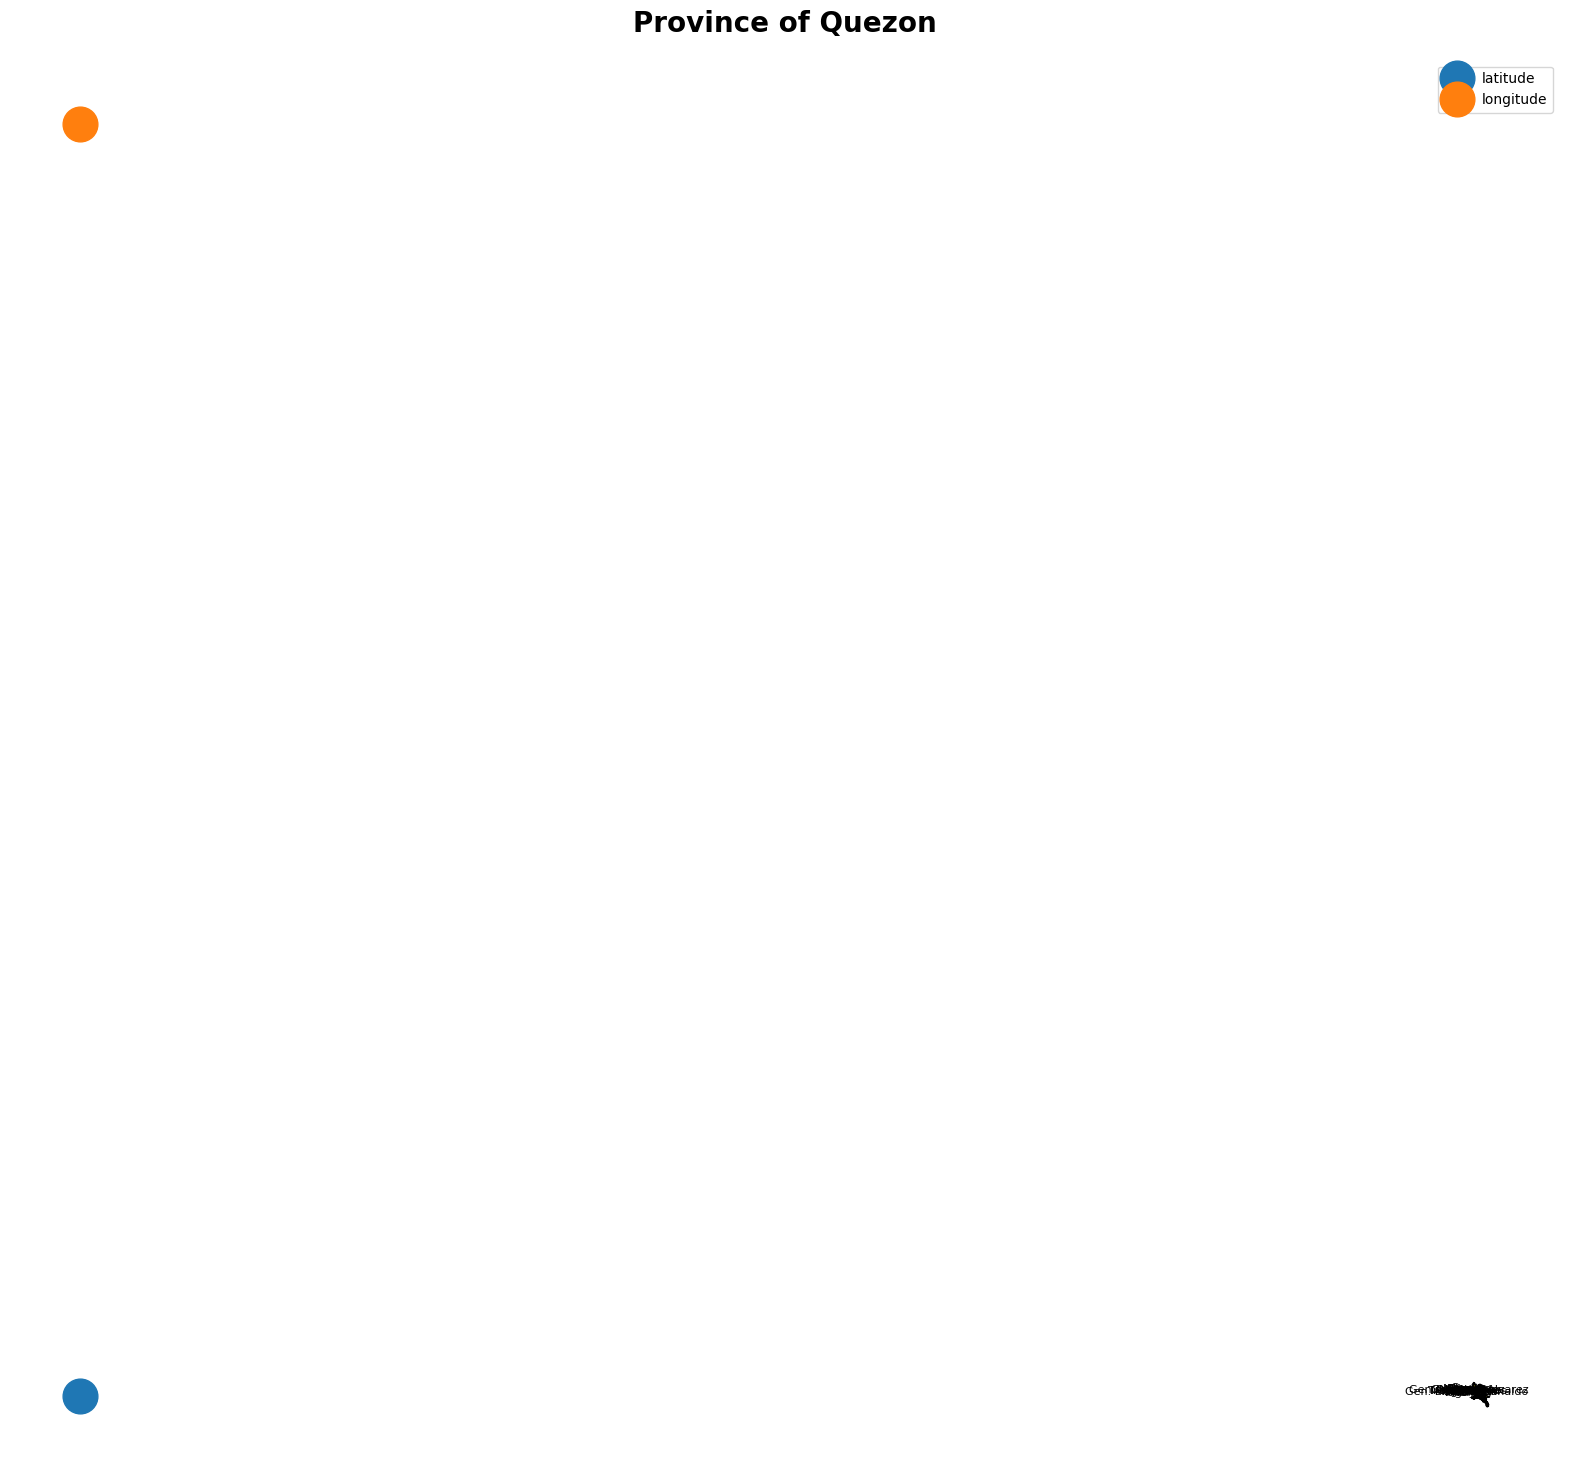

In [ ]:
# Plotting Specifics Points

# Gumawa ng Plot
fig, ax = plt.subplots(figsize=(20, 20))

# Projection ng Mapa
gdf_quezon.plot(ax = ax, color = 'yellow', edgecolor = 'black')

# Projection ng Points
for area in df_points['Area'].unique():

  df_points[df_points['Area'] == area].plot(ax = ax, marker = 'o', markersize = 25, label = area, alpha = 1)

# Title ng Mapa
ax.set_title("Province of Quezon", pad = 20, fontweight = 'bold', fontsize = 20)

# Ilagay ang mga pangalan ng Municipalities
for idx, row in final_data.iterrows():

    ax.annotate(text=row['LGU'],
                xy=row['geometry'].centroid.coords[0],
                ha='center', fontsize=8, color='black')

# Ilagay ang mga pangalan ng mga specific points
# for idx, row in df_points.iterrows():

    # ax.annotate(text=row['Area'],
                # xy=(row['geometry'].x, row['geometry'].y),
                # xytext = (row['geometry'].x + 0.135, row['geometry'].y + 0.135),
                # arrowprops = dict(facecolor = 'black', shrink = 0.10, width = 0.5),
                #ha='center', fontsize=6, color='blue')

# Tanggalin ang ticks sa x and y axis
ax.set_xticks([])
ax.set_yticks([])

# Tanngalin ang border
ax.set_axis_off()

ax.legend()

# Ipakita ang mapa na walang additional kernel details
plt.show()

# GeoPandas Part 4


In [ ]:
# Read and Process GeoJSON data

gdf = gpd.read_file('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/GeoData/gadm41_PHL_2.json')
gdf.head(1)


GID_2 GID_0      COUNTRY    GID_1 NAME_1 NL_NAME_1   NAME_2 VARNAME_2  \
0  PHL.1.1_1   PHL  Philippines  PHL.1_1   Abra        NA  Bangued        NA   

  NL_NAME_2           TYPE_2     ENGTYPE_2    CC_2    HASC_2  \
0        NA  Bayan|Munisipyo  Municipality  140101  PH.AB.BN   

                                            geometry  
0  MULTIPOLYGON (((120.6113 17.4956, 120.6055 17....

In [ ]:
# Isolate Province Only

province = 'Laguna'

gdf = gdf.query(f"NAME_1 == '{province}'")
gdf


GID_2 GID_0      COUNTRY     GID_1  NAME_1 NL_NAME_1  \
755   PHL.40.1_1   PHL  Philippines  PHL.40_1  Laguna        NA   
756   PHL.40.2_1   PHL  Philippines  PHL.40_1  Laguna        NA   
757   PHL.40.3_1   PHL  Philippines  PHL.40_1  Laguna        NA   
758   PHL.40.4_1   PHL  Philippines  PHL.40_1  Laguna        NA   
759   PHL.40.5_1   PHL  Philippines  PHL.40_1  Laguna        NA   
760   PHL.40.6_1   PHL  Philippines  PHL.40_1  Laguna        NA   
761   PHL.40.7_1   PHL  Philippines  PHL.40_1  Laguna        NA   
762   PHL.40.8_1   PHL  Philippines  PHL.40_1  Laguna        NA   
763   PHL.40.9_1   PHL  Philippines  PHL.40_1  Laguna        NA   
764  PHL.40.10_1   PHL  Philippines  PHL.40_1  Laguna        NA   
765  PHL.40.11_1   PHL  Philippines  PHL.40_1  Laguna        NA   
766  PHL.40.12_1   PHL  Philippines  PHL.40_1  Laguna        NA   
767  PHL.40.13_1   PHL  Philippines  PHL.40_1  Laguna        NA   
768  PHL.40.14_1   PHL  Philippines  PHL.40_1  Laguna        NA   
769  PHL.40.15_1   PHL  Philippines  PHL.40_1  Laguna        NA   
770  PHL.40.16_1   PHL  Philippines  PHL.40_1  Laguna        NA   
771  PHL.40.17_1   PHL  Philippines  PHL.40_1  Laguna        NA   
772  PHL.40.18_1   PHL  Philippines  PHL.40_1  Laguna        NA   
773  PHL.40.19_1   PHL  Philippines  PHL.40_1  Laguna        NA   
774  PHL.40.20_1   PHL  Philippines  PHL.40_1  Laguna        NA   
775  PHL.40.21_1   PHL  Philippines  PHL.40_1  Laguna        NA   
776  PHL.40.22_1   PHL  Philippines  PHL.40_1  Laguna        NA   
777  PHL.40.23_1   PHL  Philippines  PHL.40_1  Laguna        NA   
778  PHL.40.24_1   PHL  Philippines  PHL.40_1  Laguna        NA   
779  PHL.40.25_1   PHL  Philippines  PHL.40_1  Laguna        NA   
780  PHL.40.26_1   PHL  Philippines  PHL.40_1  Laguna        NA   
781  PHL.40.27_1   PHL  Philippines  PHL.40_1  Laguna        NA   
782  PHL.40.28_1   PHL  Philippines  PHL.40_1  Laguna        NA   
783  PHL.40.29_1   PHL  Philippines  PHL.40_1  Laguna        NA   
784  PHL.40.30_1   PHL  Philippines  PHL.40_1  Laguna        NA   
785  PHL.40.31_1   PHL  Philippines  PHL.40_1  Laguna        NA   
786  PHL.40.32_1   PHL  Philippines  PHL.40_1  Laguna        NA   
787  PHL.40.33_1   PHL  Philippines  PHL.40_1  Laguna        NA   
788  PHL.40.34_1   PHL  Philippines  PHL.40_1  Laguna        NA   
789  PHL.40.35_1   PHL  Philippines  PHL.40_1  Laguna        NA   

             NAME_2    VARNAME_2 NL_NAME_2           TYPE_2     ENGTYPE_2  \
755        Alaminos           NA        NA  Bayan|Munisipyo  Municipality   
756             Bay           NA        NA  Bayan|Munisipyo  Municipality   
757           Biñan           NA        NA  Bayan|Munisipyo  Municipality   
758         Cabuyao           NA        NA  Bayan|Munisipyo  Municipality   
759     CalambaCity           NA        NA  Lungsod|Siyudad          City   
760         Calauan           NA        NA  Bayan|Munisipyo  Municipality   
761         Cavinti           NA        NA  Bayan|Munisipyo  Municipality   
762            Famy           NA        NA  Bayan|Munisipyo  Municipality   
763        Kalayaan           NA        NA  Bayan|Munisipyo  Municipality   
764    KalibatoLake           NA        NA        Waterbody     Waterbody   
765      Lagunalake  Lagunadebay        NA        Waterbody     Waterbody   
766           Liliw           NA        NA  Bayan|Munisipyo  Municipality   
767        LosBaños     LosBaños        NA  Bayan|Munisipyo  Municipality   
768        Luisiana           NA        NA  Bayan|Munisipyo  Municipality   
769          Lumban           NA        NA  Bayan|Munisipyo  Municipality   
770         Mabitac           NA        NA  Bayan|Munisipyo  Municipality   
771       Magdalena           NA        NA  Bayan|Munisipyo  Municipality   
772        Majayjay           NA        NA  Bayan|Munisipyo  Municipality   
773       Nagcarlan           NA        NA  Bayan|Munisipyo  Municipality   
774           Paete           NA        NA  Bayan|Munisipy

In [ ]:
# Load Additional Data

data = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/GeoData/laguna_province.csv')
data.head(1)

NAME_1    NAME_2            LGU    District                  Category  \
0  Laguna  Alaminos  Alaminos (LA)  District 3  Third Class Municipality   

     Score  Population  Population Weight (50%)      Revenue  \
0  34.5807       51659                    0.008  75683851.71   

   Revenue Weight (50%)  Total Percentage  Provincial Score  \
0                 0.002              0.01            0.3423   

   Population_Growth  Unnamed: 13  Economic Dynamism  Government Efficiency  \
0               1.61          NaN              5.129                  7.237   

   Infrastructure  Resiliency  Innovation  
0          3.7536     11.4187      7.0424

In [ ]:
# Merge

gdf = pd.merge(gdf, data, on = 'NAME_2', how = 'inner')
gdf.head(1)

GID_2 GID_0      COUNTRY     GID_1 NAME_1_x NL_NAME_1    NAME_2  \
0  PHL.40.1_1   PHL  Philippines  PHL.40_1   Laguna        NA  Alaminos   

  VARNAME_2 NL_NAME_2           TYPE_2  ... Revenue Weight (50%)  \
0        NA        NA  Bayan|Munisipyo  ...                0.002   

  Total Percentage Provincial Score Population_Growth Unnamed: 13  \
0             0.01           0.3423              1.61         NaN   

  Economic Dynamism Government Efficiency Infrastructure  Resiliency  \
0             5.129                 7.237         3.7536     11.4187   

   Innovation  
0      7.0424  

[1 rows x 32 columns]

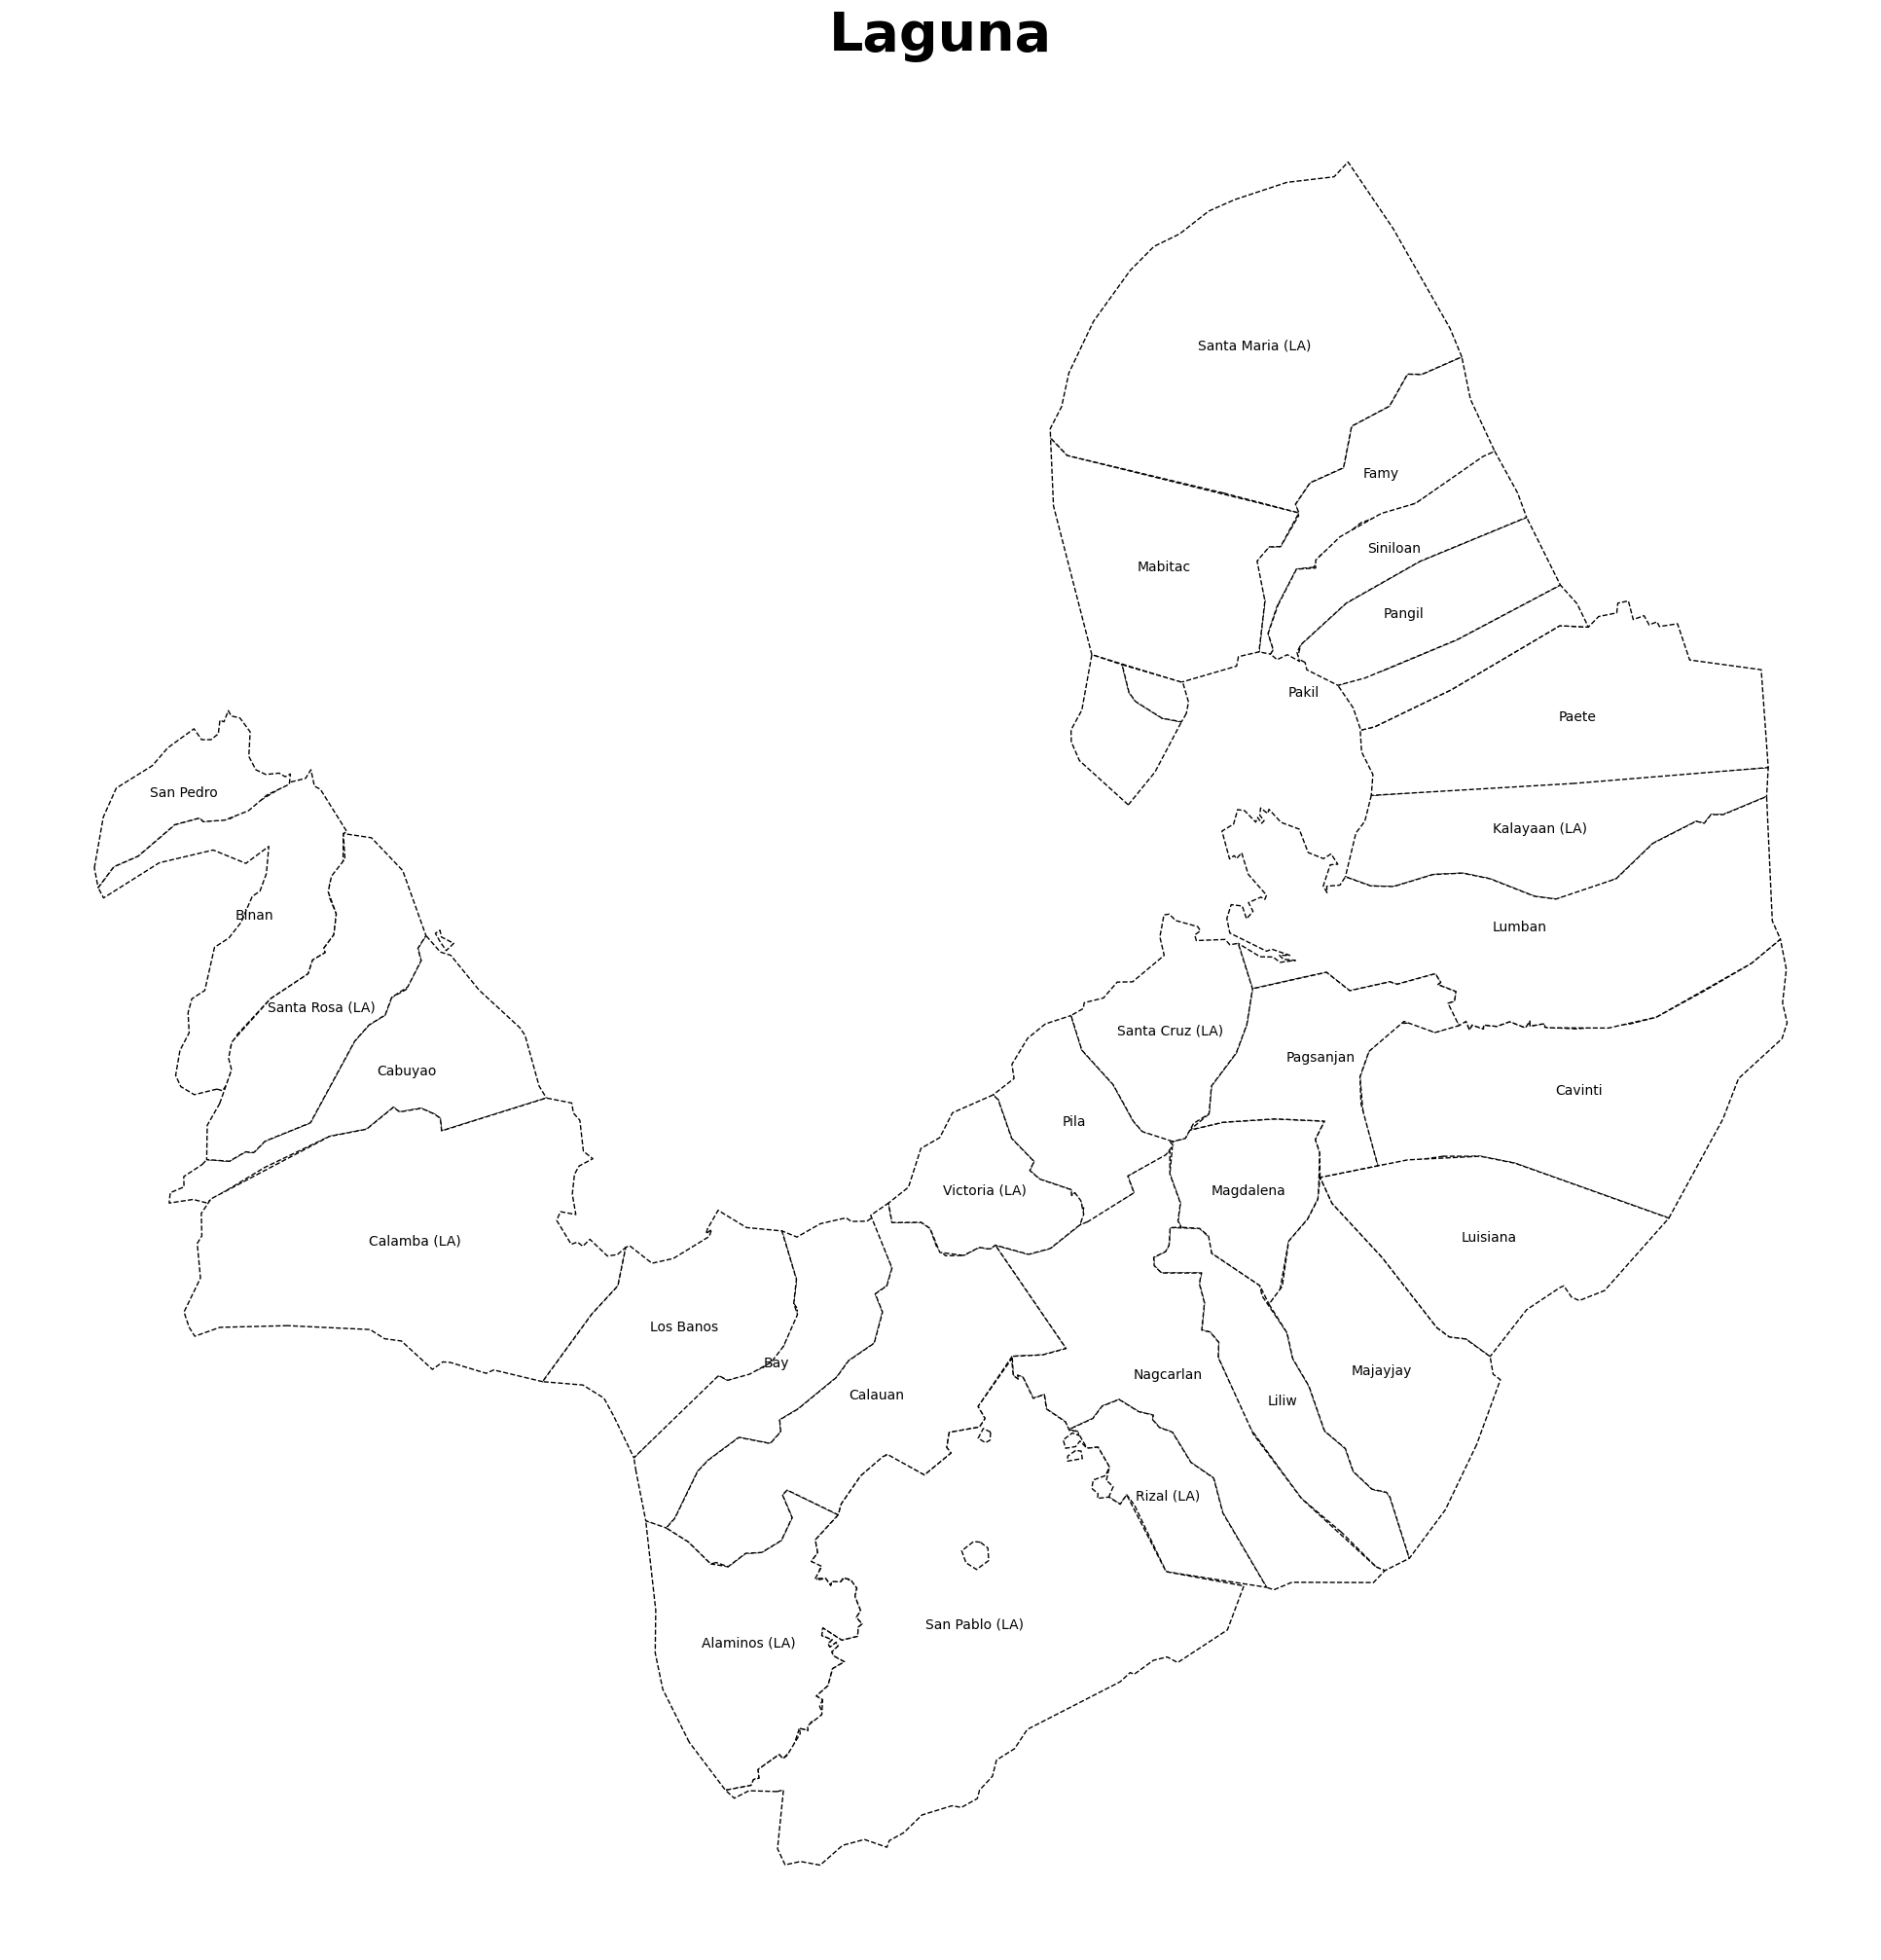

In [ ]:
# Basic Plotting

# Create a plot with a custom figure size of 10 inches wide by 8 inches tall
fig, ax = plt.subplots(figsize=(25, 25))

gdf.plot(ax = ax, color = 'white', edgecolor = 'black', linestyle = '--')

# Add a title
ax.set_title("Laguna", pad = 20, fontweight = 'bold', fontsize = 40)

# Remove Ticks
ax.set_xticks([])
ax.set_yticks([])

# Cities and Municipalities Annoation
for idx, row in gdf.iterrows():

  ax.annotate(row['LGU'], xy = row['geometry'].centroid.coords[0], ha = 'center', va = 'center')

# for district in gdf['District']:

#   gdf[gdf['District'] == district].plot(ax = ax)

# Remove borders
ax.set_axis_off()

plt.show()

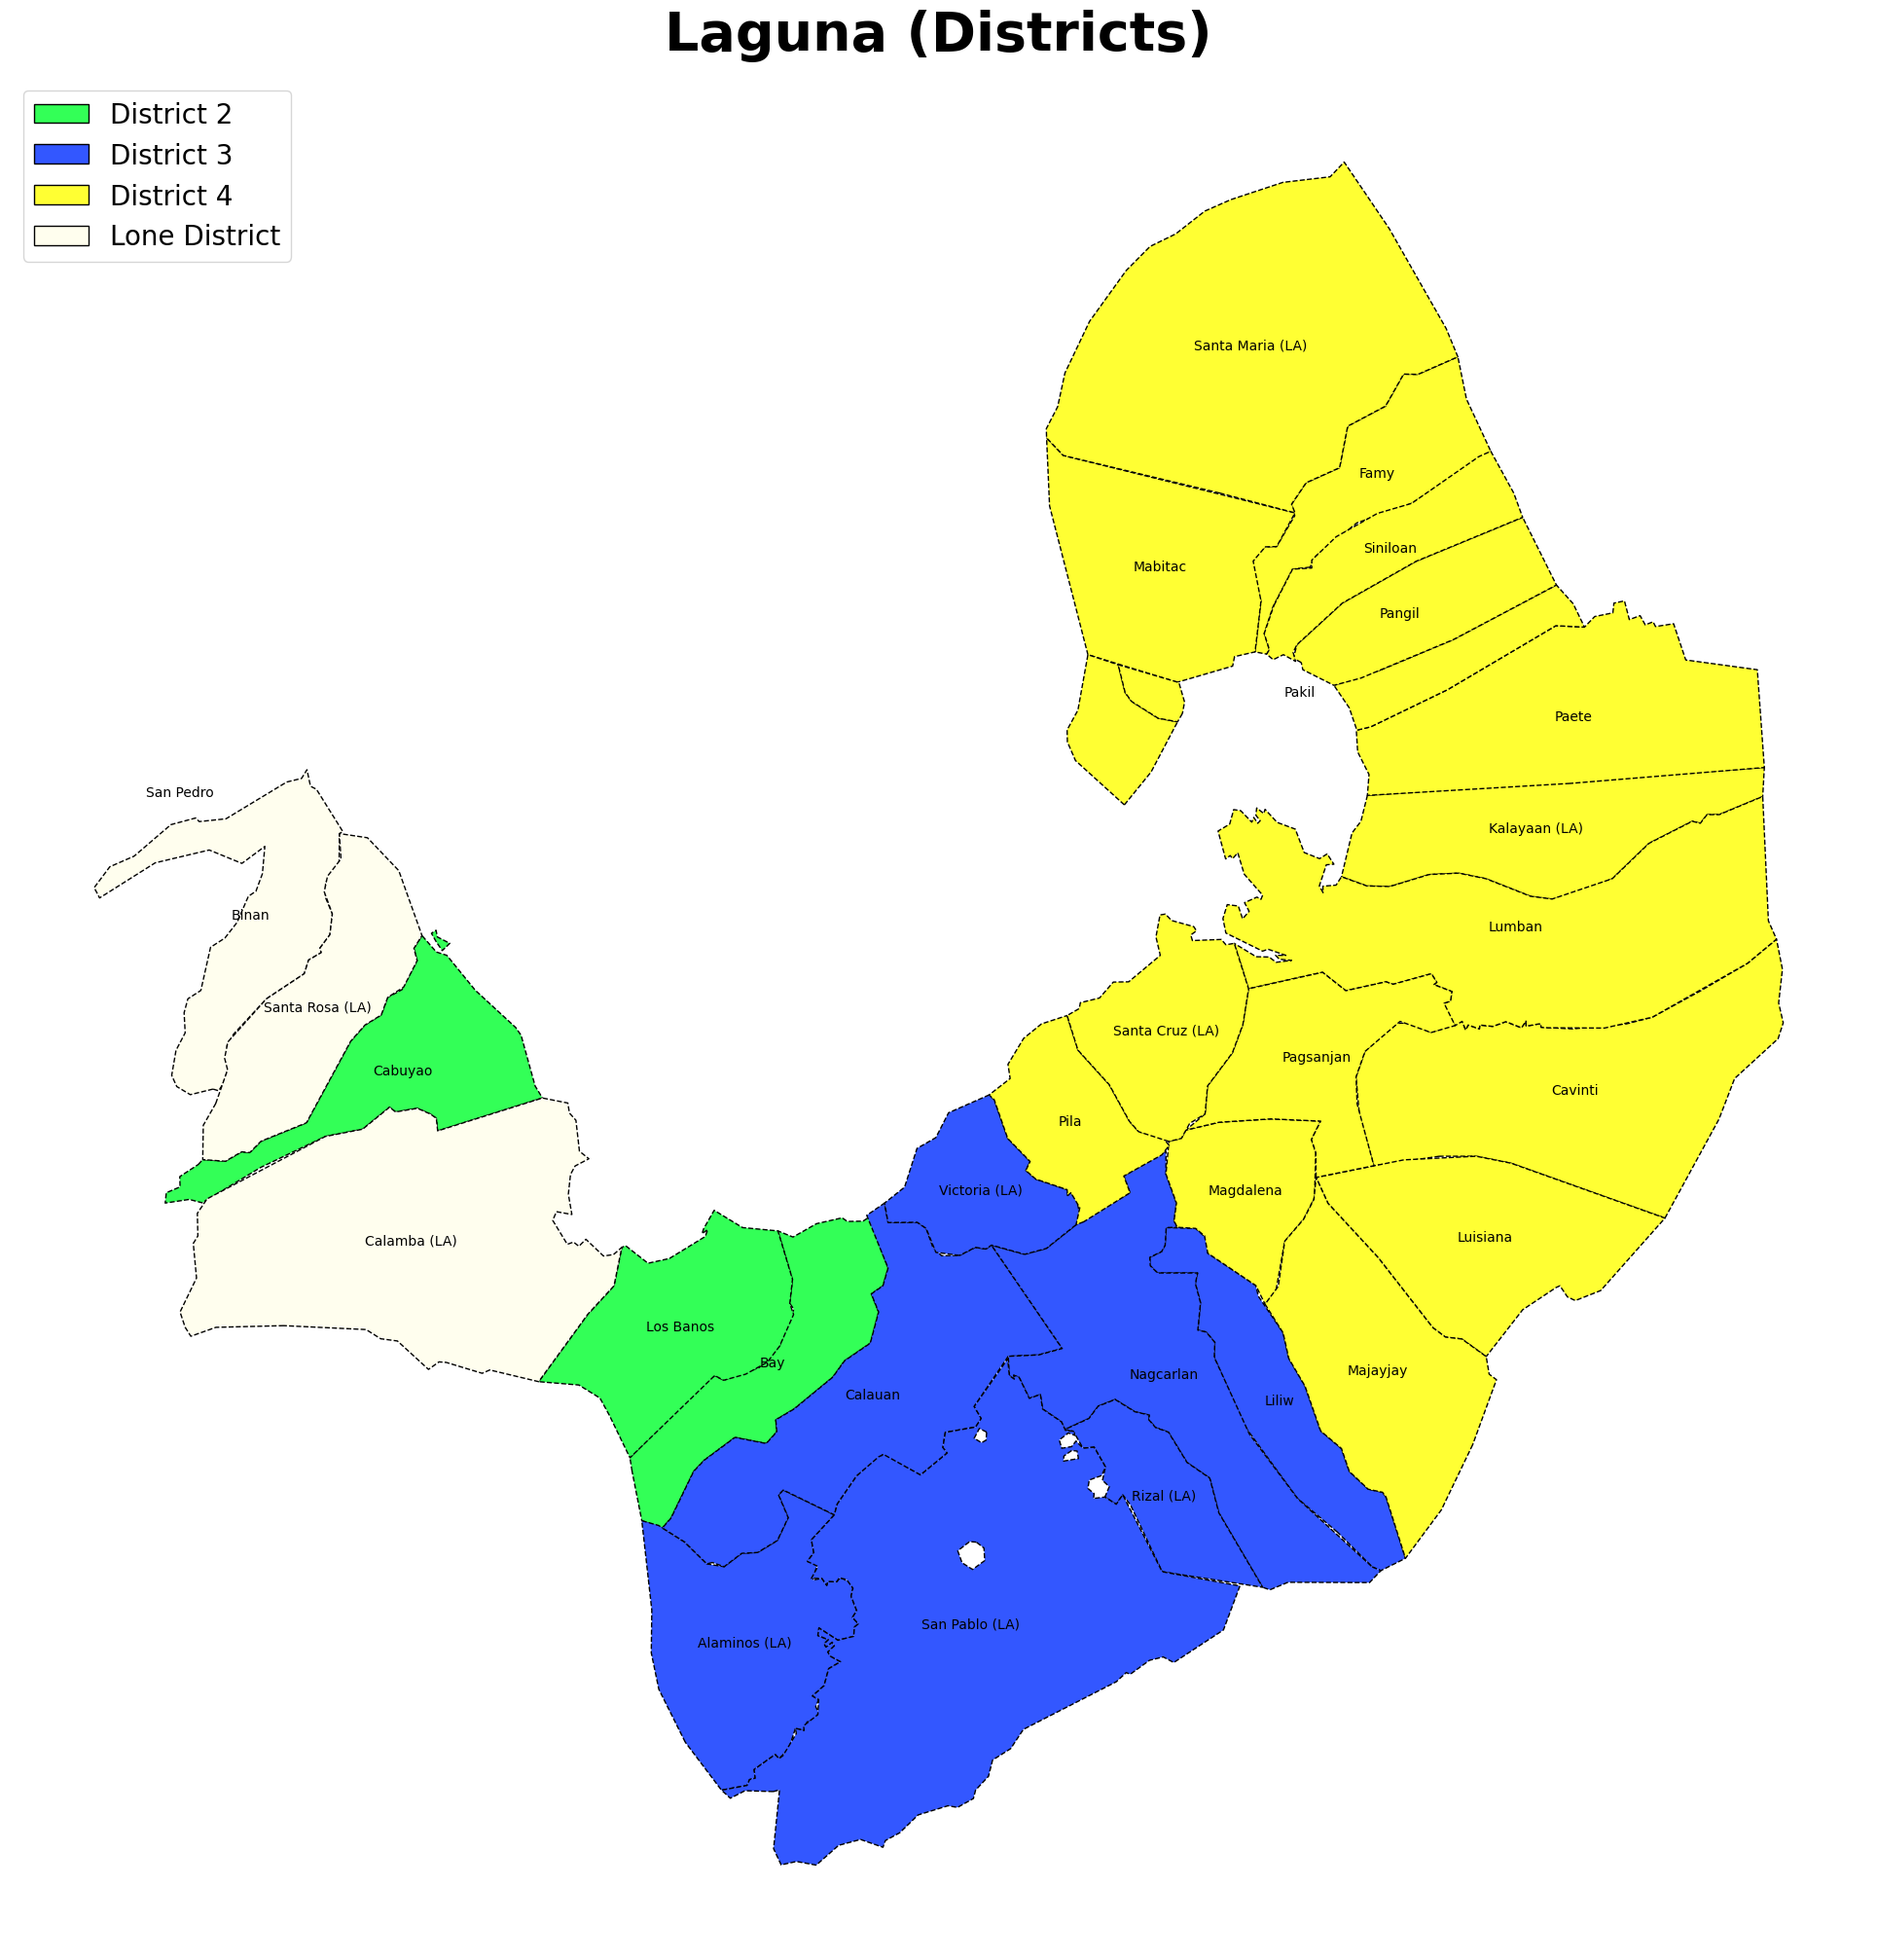

In [ ]:
from matplotlib.patches import Patch

# Define a custom color mapping for districts

custom_colors = {

    #'District 1': '#FF5733',
    'District 2': '#33FF57',
    'District 3': '#3357FF',
    'District 4': '#FFFF33',
    'Lone District': '#FFFEEE'

}

# Create a plot with a custom figure size
fig, ax = plt.subplots(figsize=(25, 25))

# Plot each district with its corresponding color from the custom mapping
for district, color in custom_colors.items():

    gdf[gdf['District'] == district].plot(ax=ax, color = color, edgecolor='black', linestyle='--')

# Add a title
ax.set_title("Laguna (Districts)", pad=20, fontweight='bold', fontsize=40)

# Remove Ticks
ax.set_xticks([])
ax.set_yticks([])

# Cities and Municipalities Annotation
for idx, row in gdf.iterrows():
    ax.annotate(row['LGU'], xy=row['geometry'].centroid.coords[0], ha='center', va='center')

# Remove borders
ax.set_axis_off()

# Legend
legend_elements = [Patch(facecolor=color, edgecolor='black', label=district)
                   for district, color in custom_colors.items()]

ax.legend(handles=legend_elements, loc='upper left', fontsize = 20)

# Show the plot
plt.show()

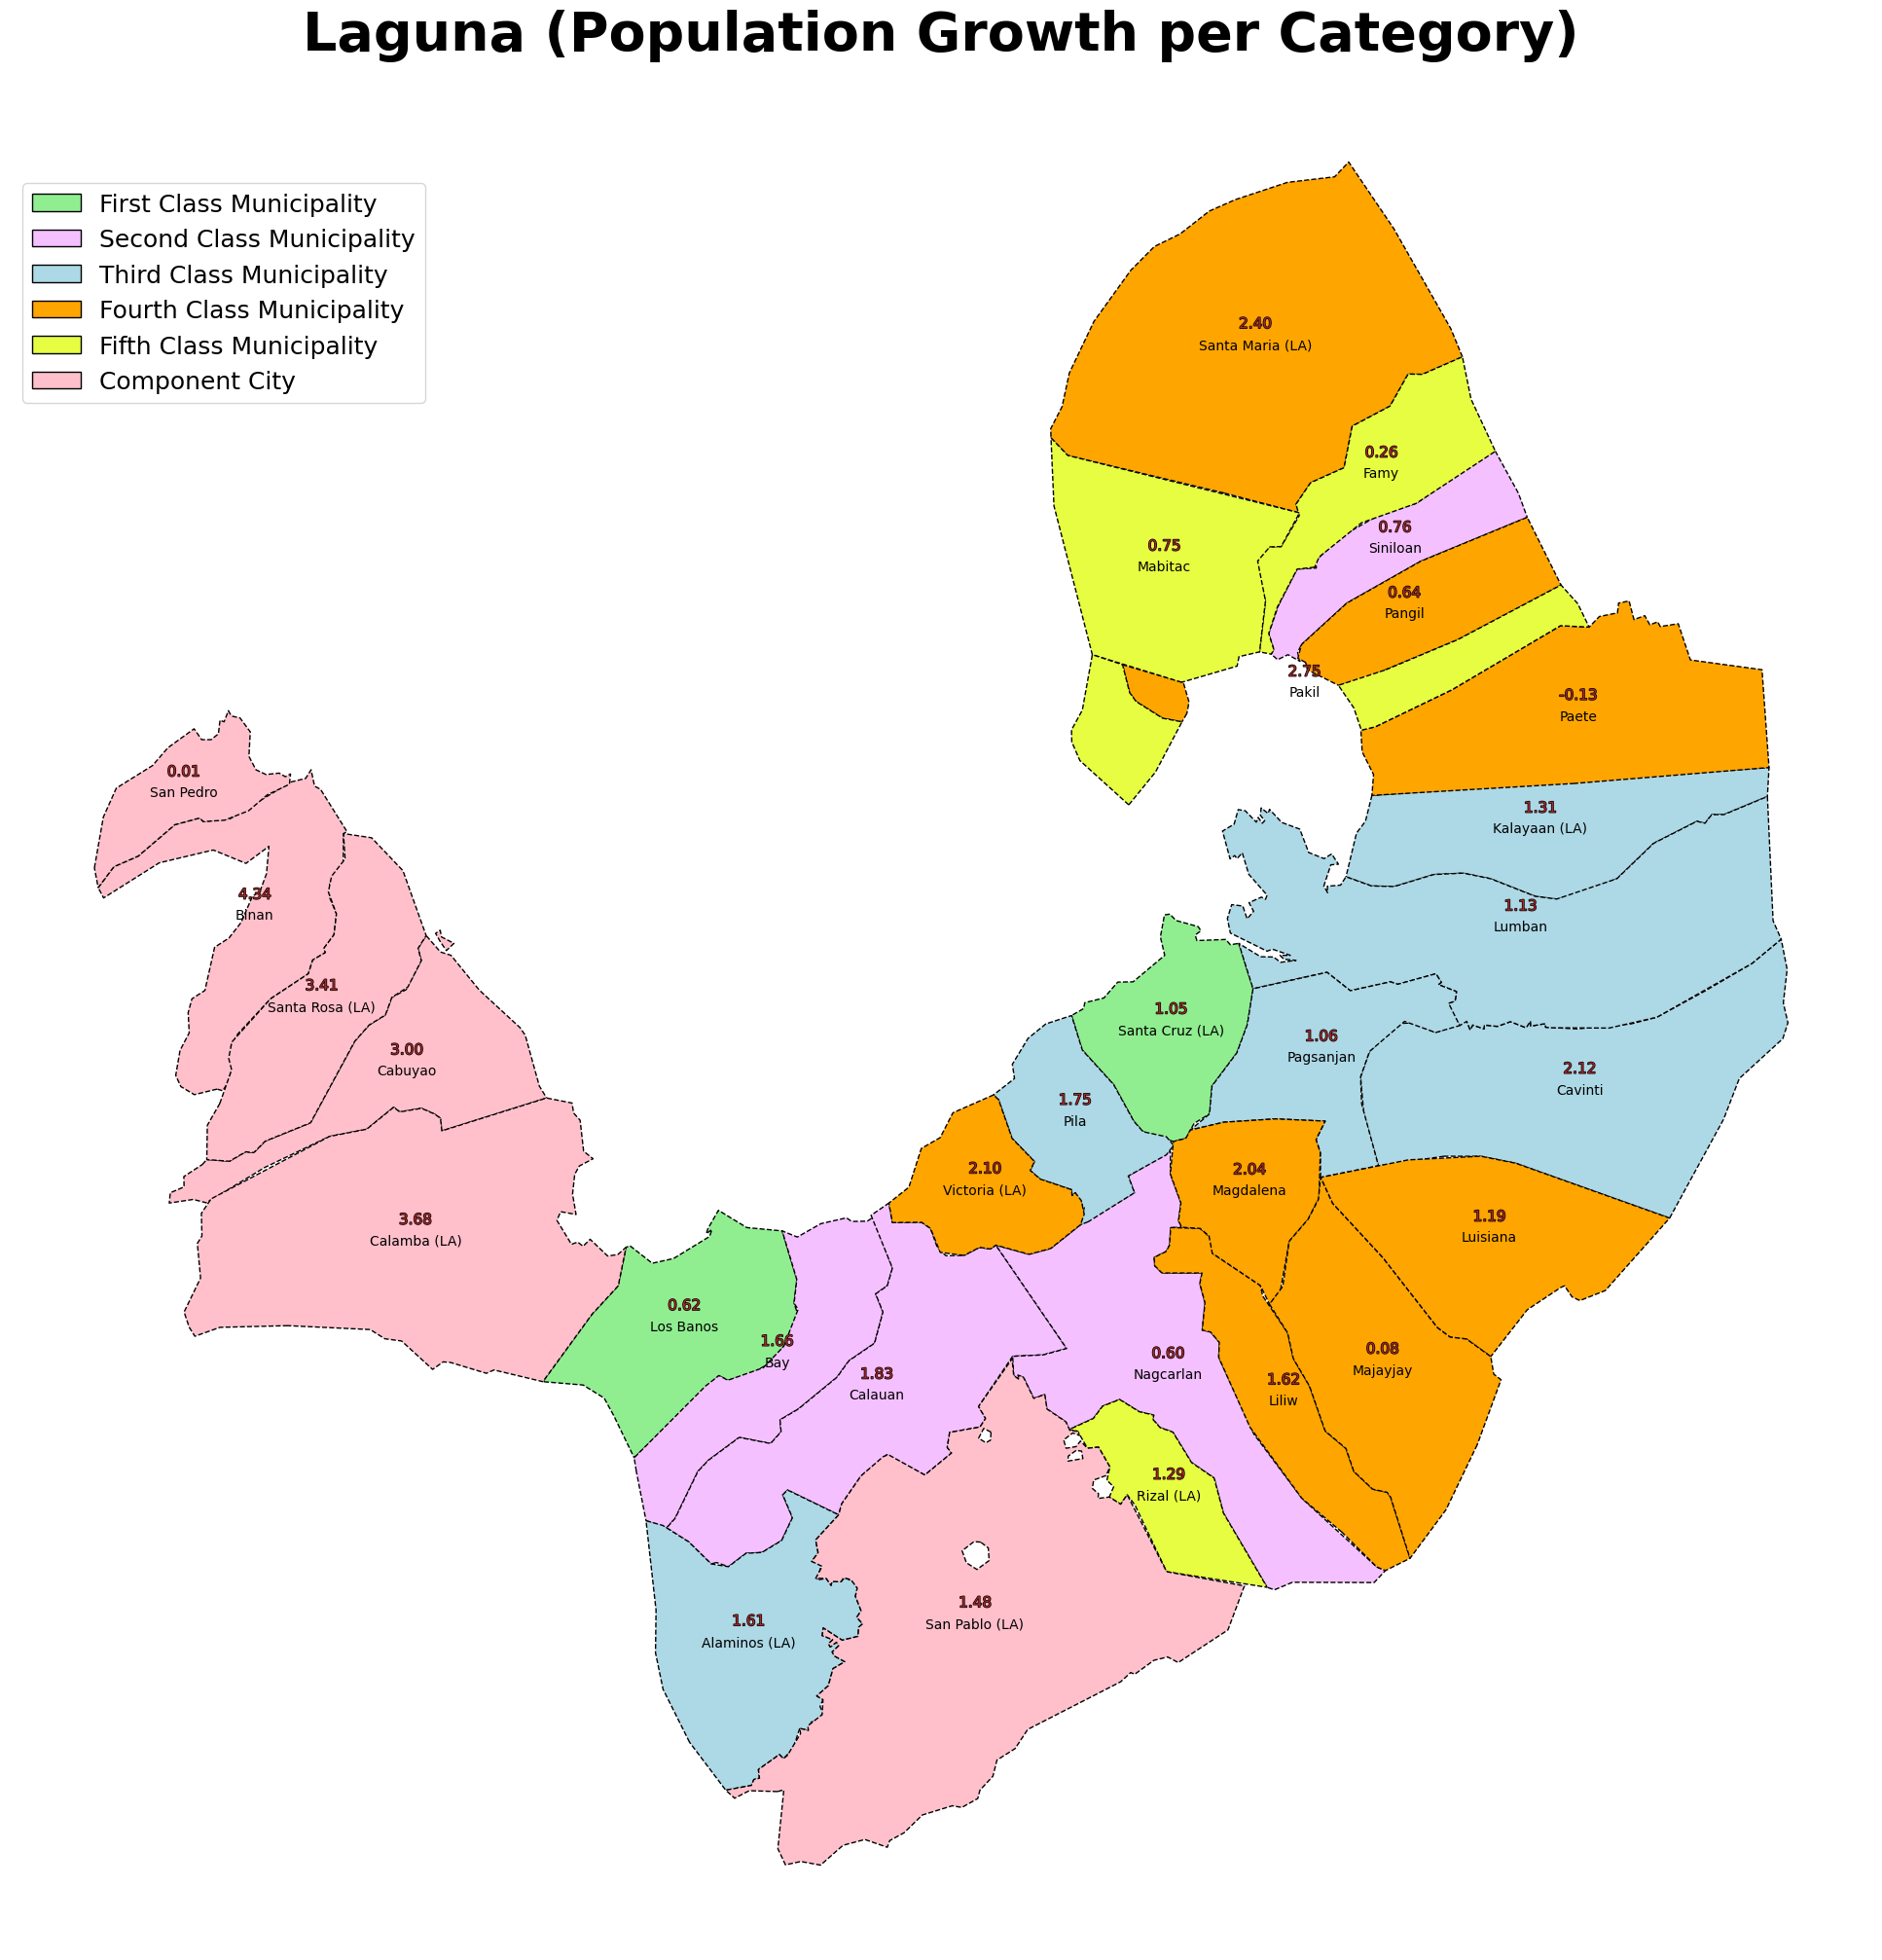

In [ ]:
from matplotlib.patches import Patch
import matplotlib.patheffects as PathEffects

# Define a custom color mapping for districts

custom_colors = {

    'First Class Municipality': 'lightgreen',
    'Second Class Municipality': '#f4c0ff',
    'Third Class Municipality': 'lightblue',
    'Fourth Class Municipality': 'orange',
    'Fifth Class Municipality': '#e6fd41',
    'Component City': 'pink'

}

# Create a plot with a custom figure size
fig, ax = plt.subplots(figsize=(25, 25))

# Plot each district with its corresponding color from the custom mapping
for category, color in custom_colors.items():

    gdf[gdf['Category'] == category].plot(ax = ax, color = color, edgecolor='black', linestyle='--')

# Add a title
ax.set_title("Laguna (Population Growth per Category)", pad=20, fontweight='bold', fontsize=40)

# Remove Ticks
ax.set_xticks([])
ax.set_yticks([])

# Cities and Municipalities Annotation
for idx, row in gdf.iterrows():

    ax.annotate(row['LGU'], xy=row['geometry'].centroid.coords[0], ha='center', va='center')

# Add an annotation
for idx, row in gdf.iterrows():

    centroid = row['geometry'].centroid
    ax.annotate(f"{row['Population_Growth']:.2f}",
                xy=(centroid.x, centroid.y + 0.0075), # Adjusted position
                ha = 'center', va = 'center',
                fontsize = 11, color='brown', path_effects=[PathEffects.withStroke(linewidth=1, foreground='black')])

# Remove borders
ax.set_axis_off()

# Legend
legend_elements = [Patch(facecolor=color, edgecolor='black', label=district)
                   for district, color in custom_colors.items()]

ax.legend(handles=legend_elements, loc='upper left', fontsize = 18, bbox_to_anchor = (0, 0.95))

# Show the plot
plt.show()

In [ ]:
gdf['Category'].unique()

array(['Third Class Municipality', 'Second Class Municipality',
       'Component City', 'Fifth Class Municipality',
       'Fourth Class Municipality', 'First Class Municipality'],
      dtype=object)